# 3<sup>o</sup> crédito de Aquisição de Conhecimento

# Agrupamento

## Sumário

- [Objetivos](#objetivos-do-trabalho)

- [Preparação](#preparacao)

- [Importando-bibliotecas](#importando-as-bibliotecas)

- [Importando-DataSet](#importando-dataset-water_flow_by_day-de-datasetsraw)

- [Exclusão-de-Colunas](#excluindo-colunas-irrelevantes)

- [Renomeando-Colunas](#renomeando-colunas)

- [Valores-Unicos-de-Colunas](#verificando-os-valores)

- [Mudancas-de-Tipos-das-Colunas](#mudanca-dos-tipos-das-colunas)

- [Analise-Exploratoria-dos-Dados](#analise-exploratoria-dos-dados-aed)

- [Verificacao-de-valores-NaN](#verificando-se-ha-valores-nans)

- [Verificacao-de-valores-nulos](#verificando-se-ha-valores-nulos)

- [Visualizacao-dos-dados](#representacao-grafica)

- [Exclusao-de-outlier-em-coluna-litros-por-cabeca](#exclusao-de-outlier-sobre-a-coluna-litros_por_cabeca)

- [Continuacao-da-visualizacao-dos-dados](#voltando-a-impressao-dos-dados)

- [Parte-1](#parte-1)

- [Parte-2](#parte-2)

## Objetivos do trabalho

No contexto de produção animal, seja a seguinte base de dados contendo o consumo diário de água pelo grupo de animais (chamado de lote):

![Exemplo_do_DataFrame](img/imagem0.png)

Para cada dia de alojamento (lot_day), temos, na ordem, a estação do ano a qual se refere
o dia, a idade dos animais do lote, o consumo médio de água por cabeça, um número identificador do lote e num número identificador do produtor/fazenda que produziu o lote.

Uma fazenda pode produzir mais de um lote.

A base contém o consumo diário entre os dias 3 e 43 de alojamento dos animais. Como mostra a imagem.

A base pode conter dados faltantes, você deve lidar com isso. Perceba que o consumo de água aumenta ao longo dos dias, então talvez preencher com valor médio não seja a solução ideal (por exemplo, o dia 3, poderia ter valor muito alto, se usarmos a média de todos os dias para preencher seu dado). Uma média local pode ser mais adequada. Além disso, descartar lotes com dados faltantes pode resultar em uma base muito pequena, então cuidado ao usar essa estratégia.

[1<sup>o</sup>](#parte-1) Você deve usar o consumo diário como variáveis para agrupar os lotes. Isto é, seu:

x<sub>1</sub> = consumo de água por cabeça no dia 3 de alojamento.

x<sub>2</sub> = consumo de água por cabeça no dia 4 de alojamento.

…

x<sub>n</sub> = consumo de água por cabeça no dia m de alojamento

a. Deve escolher quais métricas para comparação usar;

b. Qual número de grupos;

c. Qual algoritmo ou variação do algoritmo;

d. Como limpar ou lidar com os dados faltantes;

e. Para cada grupo, deve mostrar as curvas de consumo pertencentes a um grupo e seu centróide.


[2<sup>o</sup>](#parte-2) Comparar o perfil dos lotes de cada grupo encontrado. Mostrar as comparações em
gráficos e comentar sobre as diferenças ou semelhanças. Para isso, uma base de
dados auxiliar é dada, com informações extras referente ao lote:

![Exemplo_de_DataFrame](img/imagem1.png)


Em ordem: número identificador do lote, número de animais alojados, mortalidade em
percentual, idade dos animais no momento no início do lote, idade dos animais no final do
lote, peso médio dos animais no início do lote, peso médio dos animais no final do lote,
ganho de peso médio diário, consumo médio diário de ração, taxa de conversão alimentar,
dias de alojamento.

Da mesma maneira, podem haver outliers ou dados faltantes. Você não precisa usar todas
as variáveis, pode usar as mais relevantes na comparação dos grupos.

## Preparacao

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd

# bibliotecas graficas
from matplotlib import pyplot as plt
import seaborn as sns

# modelos
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Importando dataset *water_flow_by_day* de *./datasets/raw/*

In [2]:
df_waterflow_raw = pd.read_csv("datasets/raw/water_flow_by_day.csv", sep = ",")

### Alguns valores do Dataset

In [3]:
df_waterflow_raw.head(5)

Unnamed: 0  lot_day season   age  per_capita  lot_id prod_id
0           0        3    inv  23.0    0.346664  615812     n_3
1           1        4    inv  24.0    0.708991  615812     n_3
2           2        5    inv  25.0    0.936537  615812     n_3
3           3        6    inv  26.0    0.722595  615812     n_3
4           4        7    inv  27.0    0.744303  615812     n_3

Como podemos ver, temos uma coluna sem nome que atual como contador das linhas.

Nós vamos deletar esta coluna eventualmente, pois é irrelevante para o DataFrame.

### Verificando os tipos dos dados

In [4]:
df_waterflow_raw.dtypes

Unnamed: 0      int64
lot_day         int64
season         object
age           float64
per_capita    float64
lot_id          int64
prod_id        object
dtype: object

### Quantidade de linhas do DataFrame

In [5]:
df_waterflow_raw.shape[0]

6074

Como podemos ver:
- O DataFrame possui 6074 linhas;
- 6 colunas relevantes;

- 1 coluna irrelevante;

- A idade dos animais está sendo tratada como ponto flutuante;

- O lote está sendo tratado como ponto flututante;

- O id está sendo tratado como tipo Objeto.

### Excluindo colunas irrelevantes

In [6]:
df_waterflow_processed = df_waterflow_raw.drop(columns = ["Unnamed: 0"])
df_waterflow_processed.head(5)

lot_day season   age  per_capita  lot_id prod_id
0        3    inv  23.0    0.346664  615812     n_3
1        4    inv  24.0    0.708991  615812     n_3
2        5    inv  25.0    0.936537  615812     n_3
3        6    inv  26.0    0.722595  615812     n_3
4        7    inv  27.0    0.744303  615812     n_3

### Renomeando colunas

In [7]:
colunas_renomear = {
    "lot_day"       : "dia_lote",
    "season"        : "estacao_ano",
    "age"           : "idade_animal",
    "per_capita"    : "litros_por_cabeca",
    "lot_id"        : "id_lote",
    "prod_id"       : "id_produto"
}

In [8]:
df_waterflow_processed = df_waterflow_processed.rename(columns = colunas_renomear)
df_waterflow_processed.head(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca  id_lote id_produto
0         3         inv          23.0           0.346664   615812        n_3
1         4         inv          24.0           0.708991   615812        n_3
2         5         inv          25.0           0.936537   615812        n_3
3         6         inv          26.0           0.722595   615812        n_3
4         7         inv          27.0           0.744303   615812        n_3

### Verificando os valores

#### Valores únicos de cada coluna não numérica

##### Estação do ano

In [9]:
df_waterflow_processed.estacao_ano.unique()

array(['inv', 'out', 'pri', 'ver'], dtype=object)

##### ID do Lote

In [10]:
df_waterflow_processed.id_lote.unique()

array([615812, 880714, 339544, 339545, 339546, 387681, 393432, 403726,
       414323, 436332, 479845, 491363, 514226, 527072, 536408, 562446,
       589872, 637193, 664685, 720666, 758507, 794864, 542538, 542539,
       562033, 592317, 622239, 640128, 698330, 744887, 423966, 447340,
       483807, 507626, 523619, 530999, 544600, 582096, 610732, 629640,
       653501, 712037, 755669, 783289, 869971, 388793, 388794, 389469,
       400085, 483075, 501978, 522737, 529206, 544291, 571905, 607321,
       631156, 642729, 699708, 743546, 771448, 837020, 916201, 340063,
       340064, 387761, 389526, 395027, 406984, 418361, 445237, 637069,
       680260, 731535, 767820, 813661, 476539, 499077, 516748, 528115,
       539831, 339985, 339986, 339987, 389518, 393790, 405280, 415853,
       464403, 569703, 632012, 543334, 582752, 592484, 622513, 638672,
       687045, 743547, 771449, 340031, 340032, 340033, 387751, 393478,
       405281, 414343, 438737, 474020, 494878, 516243, 486165, 509381,
      

##### ID do Produto

In [11]:
df_waterflow_processed.id_produto.unique()

array(['n_3', 'n_0', 'n_1', 'n_2', 'n_9', 'n_5', 'n_11', 'n_4', 'n_6',
       'n_7', 'n_8', 'n_10', 'n_13', 'n_18'], dtype=object)

#### Verificando os valores únicos da coluna *dia_lote*

In [12]:
df_waterflow_processed.dia_lote.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43])

### Mudanca dos tipos das colunas

#### Colunas categóricas

In [13]:
# dia_lote, estacao_ano, id_lote e id_produto
df_waterflow_processed.dia_lote = df_waterflow_processed.dia_lote.astype("category")
df_waterflow_processed.estacao_ano = df_waterflow_processed.estacao_ano.astype("category")
df_waterflow_processed.id_lote = df_waterflow_processed.id_lote.astype("category")
df_waterflow_processed.id_produto = df_waterflow_processed.id_produto.astype("category")

#### Colunas numéricas

In [14]:
# idade_animal
df_waterflow_processed.idade_animal = df_waterflow_processed.dia_lote.astype("uint8")

#### DataFrame atual

In [15]:
df_waterflow_processed.sample(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
2596       10         inv            10           0.306491  445237        n_2
4421       37         ver            37           3.700798  536193        n_6
5877       40         pri            40           1.781032  649206       n_13
2534       29         out            29           3.004698  406984        n_2
806         3         ver             3           2.330267  758507        n_3

#### Tipos das colunas

In [16]:
df_waterflow_processed.dtypes

dia_lote             category
estacao_ano          category
idade_animal            uint8
litros_por_cabeca     float64
id_lote              category
id_produto           category
dtype: object

### Salvando o DataFrame processado

In [17]:
df_waterflow_processed.to_pickle("datasets/processed/dataset-gasto-agua.pkl")

### Analise Exploratoria dos Dados (AED)

#### Idade

##### Cálculo da média

In [18]:
round(df_waterflow_processed.idade_animal.mean(), 3)

22.956

##### Cálculo da mediana

In [19]:
df_waterflow_processed.idade_animal.median()

23.0

##### Desvio padrão

In [20]:
round(df_waterflow_processed.idade_animal.std(), 3)

11.78

##### Valor mínimo

In [21]:
df_waterflow_processed.idade_animal.min()

3

##### Valor máximo

In [22]:
df_waterflow_processed.idade_animal.max()

43

#### Litros por cabeça

##### Cálculo da média

In [23]:
round(df_waterflow_processed.litros_por_cabeca.mean(), 3)

2.595

##### Cálculo da mediana

In [24]:
round(df_waterflow_processed.litros_por_cabeca.median(), 3)

2.209

##### Desvio padrão

In [25]:
round(df_waterflow_processed.litros_por_cabeca.std(), 3)

1.854

##### Valor mínimo

In [26]:
round(df_waterflow_processed.litros_por_cabeca.min(), 3)

0.002

##### Valor máximo

In [27]:
round(df_waterflow_processed.litros_por_cabeca.max(), 3)

22.702

#### dia do lote

##### Quantidade de elementos em cada lote

In [28]:
df_waterflow_processed.groupby("dia_lote").agg("count")

estacao_ano  idade_animal  litros_por_cabeca  id_lote  id_produto
dia_lote                                                                   
3                 115           115                115      115         115
4                 127           127                127      127         127
5                 144           144                144      144         144
6                 152           152                152      152         152
7                 156           156                156      156         156
8                 161           161                161      161         161
9                 162           162                162      162         162
10                165           165                165      165         165
11                149           149                149      149         149
12                149           149                149      149         149
13                155           155                155      155         155
14                158           158                158      158         158
15                153           153                153      153         153
16                148           148                148      148         148
17                149           149                149      149         149
18                154           154                154      154         154
19                158           158                158      158         158
20                156           156                156      156         156
21                151           151                151      151         151
22                160           160                160      160         160
23                151           151                151      151         151
24                149           149                149      149         149
25                148           148                148      148         148
26                154           154                154      154         154
27                133           133                133      133         133
28                135           135                135      135         135
29                136           136                136      136         136
30                137           137                137      137         137
31                140           140                140      140         140
32                138           138                138      138         138
33                142           142                142      142         142
34                143           143                143      143         143
35                140           140                140      140         140
36                140           140                140      140         140
37                154           154                154      154         154
38                150           150                150      150         150
39                158           158                158      158         158
40                155           155                155      155         155
41                159           159                159      159         159
42                145           145                145      145         145
43                145           145                145      145         145

#### Estação do ano

##### Quantidade de elementos em cada estacao_ano

In [29]:
df_waterflow_processed.groupby("estacao_ano", sort = True).agg("count")

dia_lote  idade_animal  litros_por_cabeca  id_lote  id_produto
estacao_ano                                                                
inv              1550          1550               1550     1550        1550
out              1282          1282               1282     1282        1282
pri              1745          1745               1745     1745        1745
ver              1497          1497               1497     1497        1497

#### ID do lote

##### Quantidade de elementos em cada id_lote

In [30]:
df_waterflow_processed.groupby("id_lote", sort = True).agg("count")

dia_lote  estacao_ano  idade_animal  litros_por_cabeca  id_produto
id_lote                                                                    
339039         40           40            40                 40          40
339040         39           39            39                 39          39
339041         38           38            38                 38          38
339083         28           28            28                 28          28
339084         40           40            40                 40          40
...           ...          ...           ...                ...         ...
869971         39           39            39                 39          39
880714         41           41            41                 41          41
902085         40           40            40                 40          40
912928         13           13            13                 13          13
916201         30           30            30                 30          30

[188 rows x 5 columns]

#### ID do produto

##### Quantidade de elementos em cada id_produto

In [31]:
df_waterflow_processed.groupby("id_produto", sort = True).agg("count")

dia_lote  estacao_ano  idade_animal  litros_por_cabeca  id_lote
id_produto                                                                 
n_0              247          247           247                247      247
n_1              665          665           665                665      665
n_10             199          199           199                199      199
n_11              46           46            46                 46       46
n_13             377          377           377                377      377
n_18             113          113           113                113      113
n_2              829          829           829                829      829
n_3              887          887           887                887      887
n_4              602          602           602                602      602
n_5              587          587           587                587      587
n_6              718          718           718                718      718
n_7              300          300           300                300      300
n_8              326          326           326                326      326
n_9              178          178           178                178      178

### Verificando se ha valores NaN's

In [32]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isna(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Verificando se ha valores nulos

In [33]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isnull(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Representacao grafica

#### Histograma

In [34]:
def histograma(x:pd.Series, titulo:str = "Histograma", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.hist(x = x)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Scatterplot

In [35]:
def dispersao(x:pd.Series, y:pd.Series, titulo:str = "Gráfico de dispersão", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.scatter(x = x, y = y)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Boxplot

In [36]:
def boxplot(x:pd.Series, titulo:str = "Gráfico de boxplot", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.boxplot(x = x)
    plt.title(titulo)
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Distribuicao normal

In [37]:
def distribuicao_normal(x:pd.Series, titulo:str = "Gráfico de distribuição normal", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.distplot(x = x)
    plt.title(titulo)
    plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

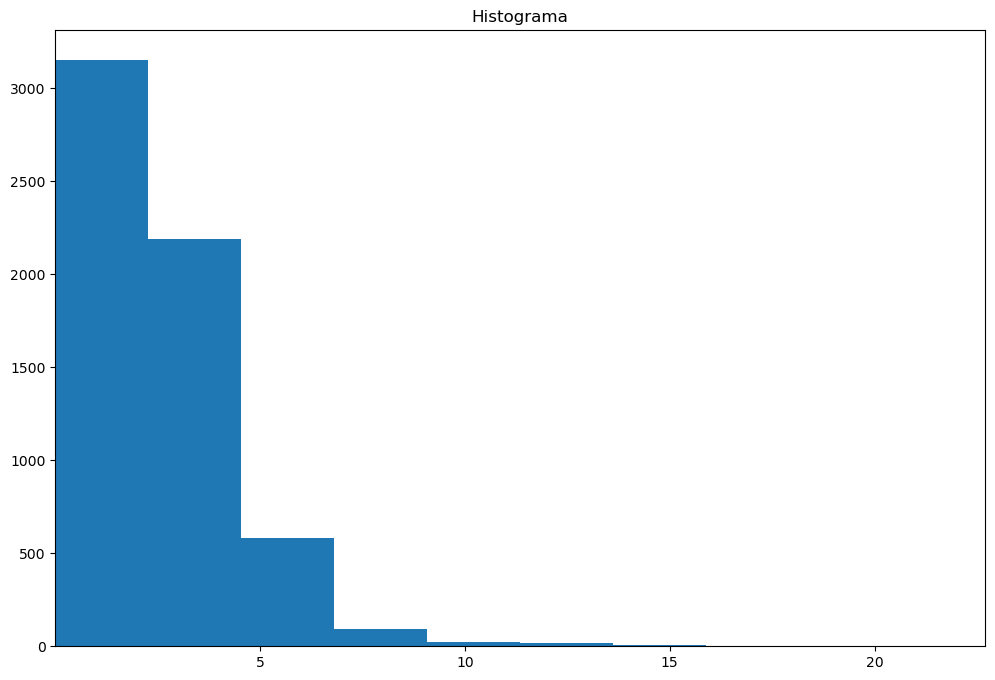

In [38]:
histograma(x = df_waterflow_processed["litros_por_cabeca"])

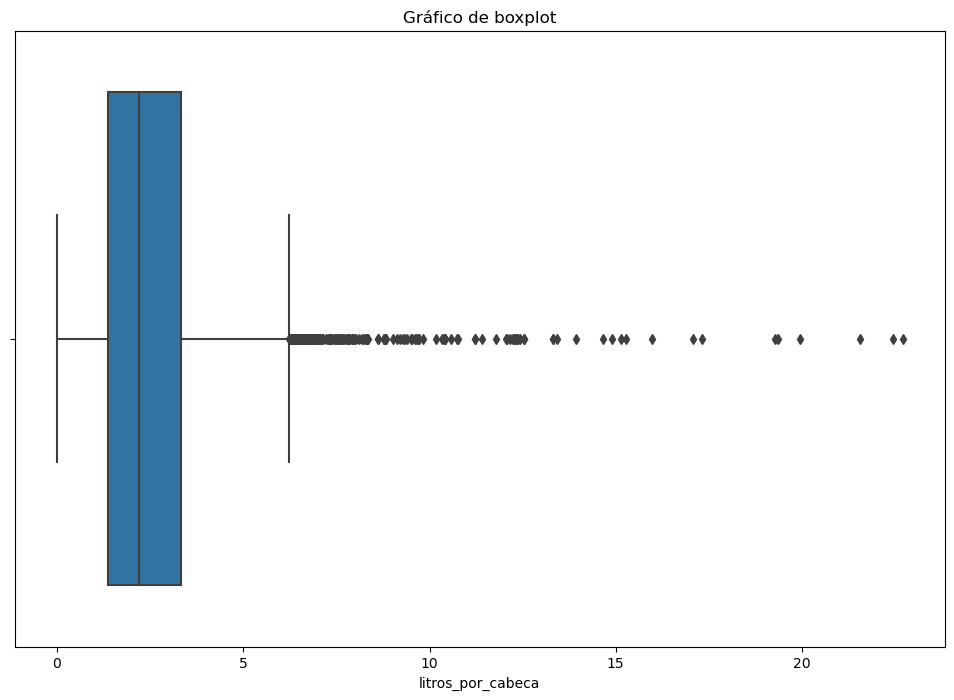

In [39]:
boxplot(x = df_waterflow_processed["litros_por_cabeca"])

Como podemos perceber, há muitos valores outliers em *litros_por_cabeca*.

Vamos excluir esses outliers utilizando do IQR.

#### Exclusao de outlier sobre a coluna *litros_por_cabeca*

##### recebendo os quartis e o interquartil

In [40]:
quartil1 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 25, method = "midpoint")
quartil3 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 75, method = "midpoint")
interquartil = quartil3 - quartil1
print("1ro quartil: ", quartil1, "\n3ro quartil: ", quartil3, "\nIQR: ", interquartil)

1ro quartil:  1.3804705774106911 
3ro quartil:  3.322055538696006 
IQR:  1.9415849612853147


##### Recebendo os valores de limite superior e inferior

In [41]:
limite_superior = quartil3 + (1.5 * interquartil)
limite_inferior = quartil1 - (1.5 * interquartil)
print("limite inferior: ", limite_inferior, "\nLimite Superior: ", limite_superior)

limite inferior:  -1.5319068645172806 
Limite Superior:  6.2344329806239775


##### Verificando a possibilidade de interferencia no dataframe com a exclusão dos valores outliers

Com o limite inferior:

In [42]:
df_waterflow_processed.query("litros_por_cabeca < @limite_inferior")

Empty DataFrame
Columns: [dia_lote, estacao_ano, idade_animal, litros_por_cabeca, id_lote, id_produto]
Index: []

O dataset não possui valores abaixo do limite inferior.

Isso pode ser notado acima, onde vimos que o limite inferior é um valor negativo.

Em nosso caso, não há possibilidade de valores negativos no dataset.

Com o limite superior:

In [43]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior")

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
107        28         inv            28           7.565062  339544        n_3
108        29         inv            29          12.056683  339544        n_3
109        30         inv            30          12.286047  339544        n_3
110        31         inv            31          12.531358  339544        n_3
111        32         inv            32          11.208613  339544        n_3
...       ...         ...           ...                ...     ...        ...
5763       42         out            42           7.024104  539832       n_13
5764       43         out            43           7.578803  539832       n_13
5821       36         inv            36           6.908298  607457       n_13
5822       37         inv            37           7.859200  607457       n_13
5823       38         inv            38           6.759293  607457       n_13

[222 rows x 6 columns]

Veriricando a quantidade total de linha afetadas:

In [44]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]

222

Verificando o tamanho do nosso dataset:

In [45]:
df_waterflow_processed.shape[0]

6074

Calculando a porcentagem de perda de linhas:

In [46]:
linhas_total = df_waterflow_processed.shape[0]
linhas_a_apagar = df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]
((linhas_total - linhas_a_apagar) / linhas_total) * 100

96.34507737899243

Podemos então ver que, após a exclusão, perderemos por volta de 4% do nosso dataset.

4% é um valor viável, portanto iremos continuar com a exclusão.

##### Exclusao dos valores

In [47]:
df_limpo = df_waterflow_processed[~(df_waterflow_processed["litros_por_cabeca"] > limite_superior)]
df_limpo.sample(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
1281        4         pri             4           1.034833  523619        n_1
5439       12         inv            12           1.219701  622508       n_10
1520       27         pri            27           0.638065  653501        n_1
890        13         ver            13           0.955152  542538        n_0
572        12         ver            12           2.501258  536408        n_3

##### Como nossos dados ficaram após a exclusão:

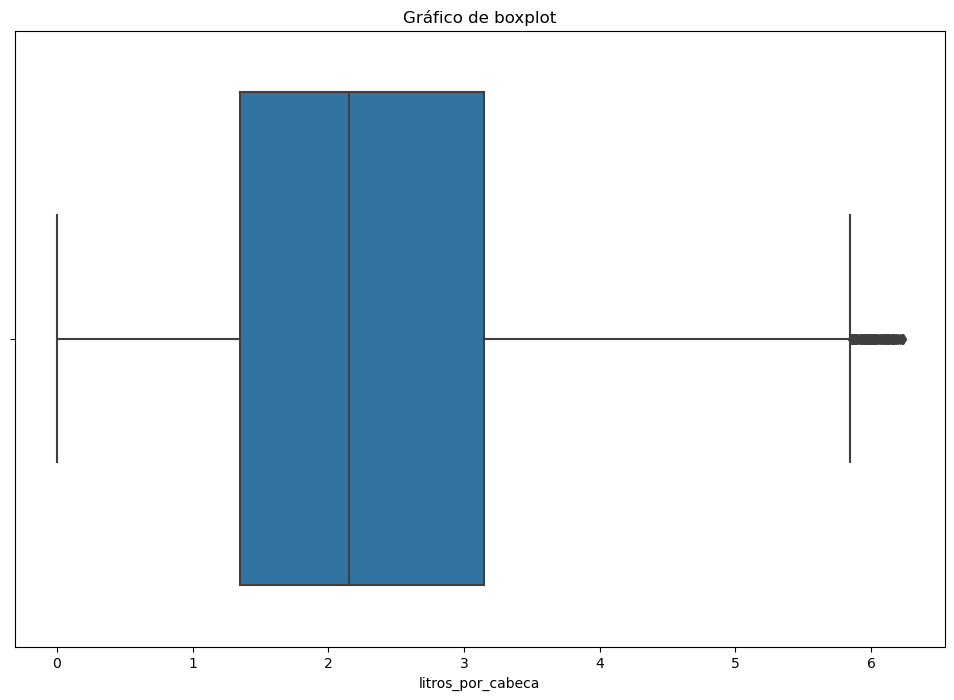

In [48]:
boxplot(x = df_limpo["litros_por_cabeca"])

#### Voltando a impressao dos dados

/tmp/ipykernel_48877/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


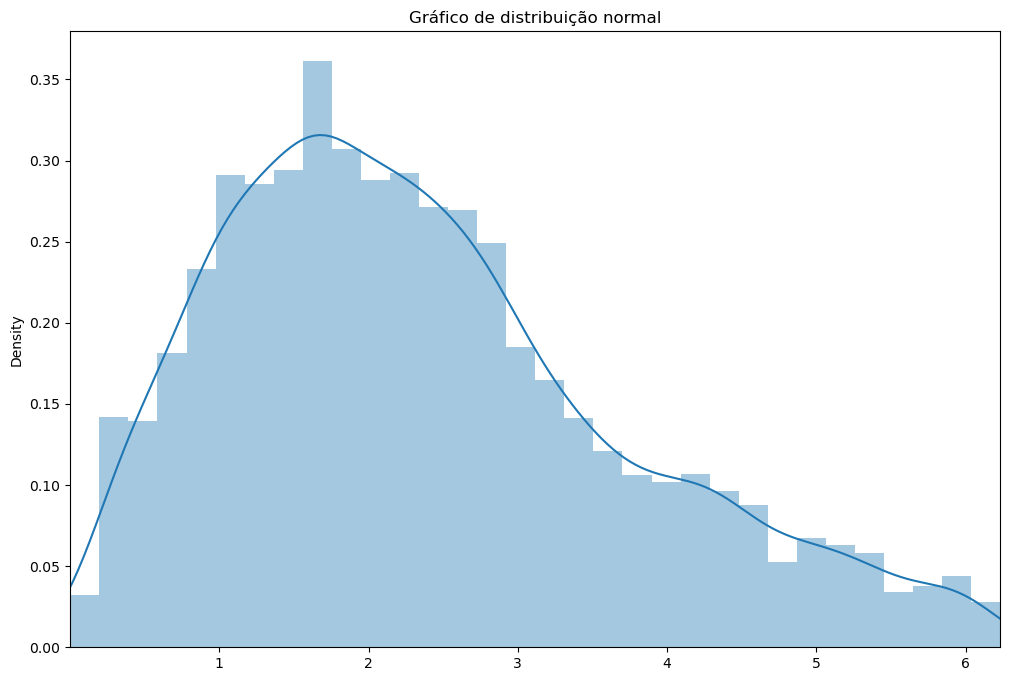

In [49]:
distribuicao_normal(x = df_limpo["litros_por_cabeca"])

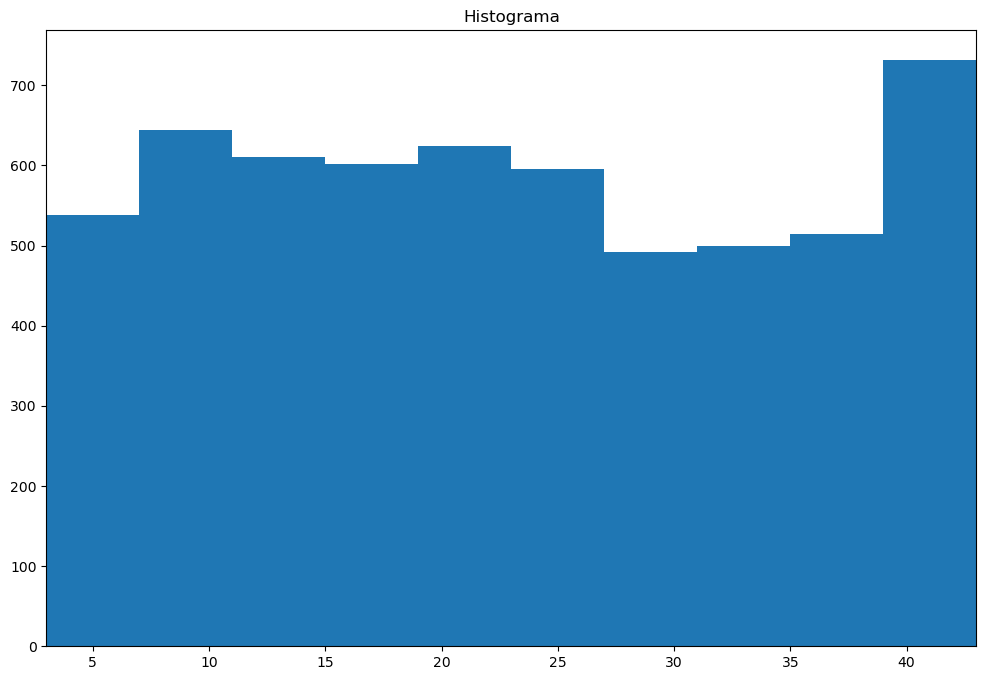

In [50]:
histograma(x = df_limpo["idade_animal"])

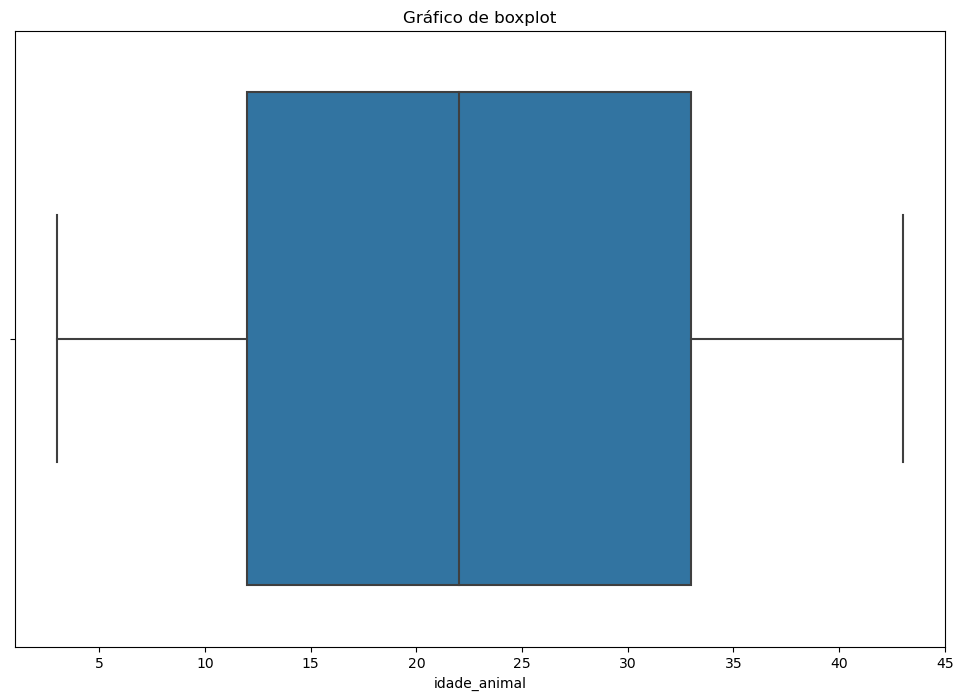

In [51]:
boxplot(x = df_limpo["idade_animal"])

/tmp/ipykernel_48877/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


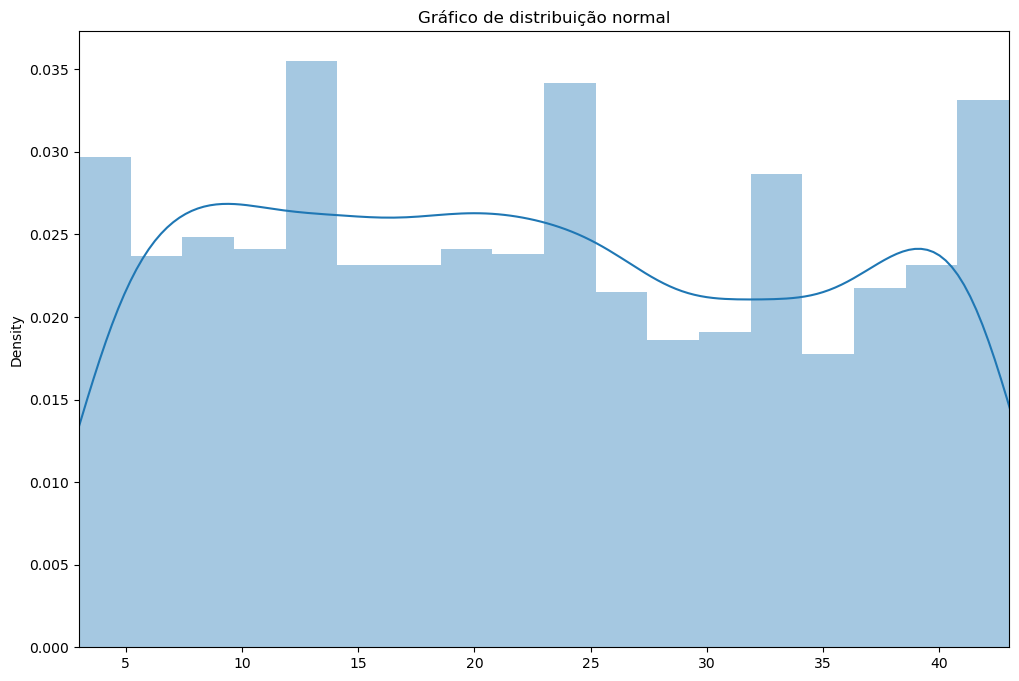

In [52]:
distribuicao_normal(x = df_limpo["idade_animal"])

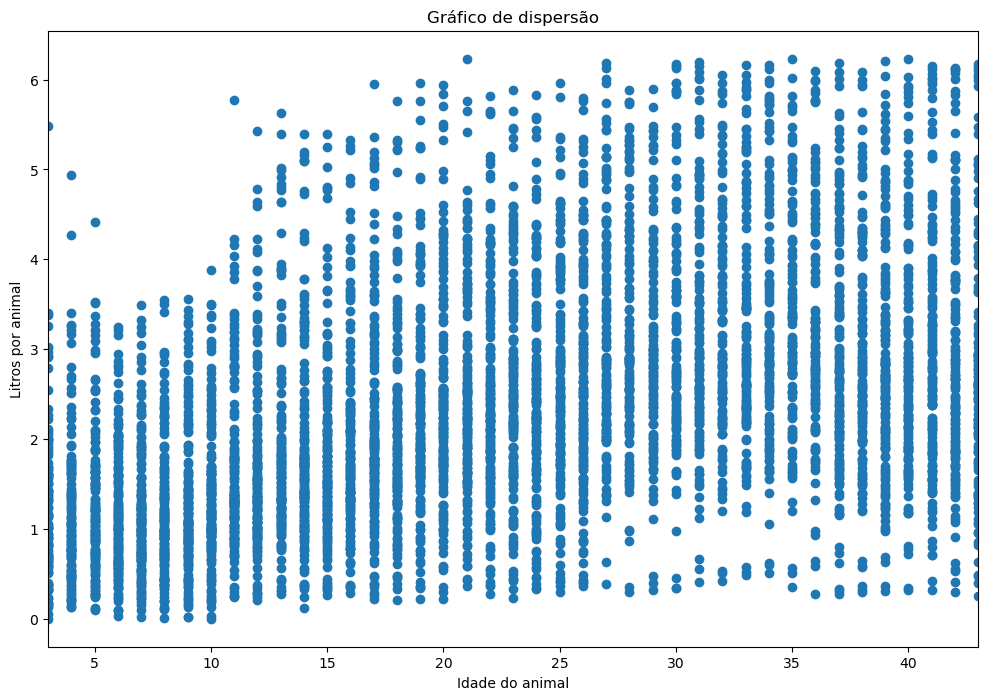

In [53]:
dispersao(
    y = df_limpo["litros_por_cabeca"],
    x = df_limpo["idade_animal"],
    xlabel = "Idade do animal",
    ylabel = "Litros por animal"
)

### Salvando o dataset limpo em um arquivo .pkl

In [54]:
df_limpo.to_pickle("datasets/processed/dataset-processado-limpo.pkl")

## Parte 1

### Como esta o dataset atual

In [55]:
df_limpo.sample(10)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
628        28         out            28           2.882302  562446        n_3
2060       38         inv            38           1.350396  607321        n_2
5116       40         pri            40           2.270277  486166        n_8
1763       16         ver            16           1.509335  389469        n_1
4777       28         inv            28           5.270006  339083        n_7
3174       36         inv            36           5.114358  622513        n_4
5669       11         pri            11           3.186570  514220       n_13
2810       12         inv            12           1.673997  339985        n_5
1113        5         ver             5           0.416269  744887        n_0
1076        5         pri             5           0.095657  698330        n_0

### Fazendo o pivoteamento do dataset

In [56]:
df_pivoteado = df_limpo.pivot_table(index="id_lote", columns = "dia_lote", values = "litros_por_cabeca")

#### Resultado do pivoteamento

In [57]:
df_pivoteado.sample(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
794864    3.011424  2.565451  2.958883  2.048045  1.339847  1.351635   
642729    0.698515  0.453879  0.529739  0.548374  1.252821  1.175144   
438737         NaN       NaN  1.486807  1.283419  1.219831  1.149177   
771449         NaN       NaN       NaN       NaN       NaN       NaN   
562033         NaN       NaN  2.556692  1.651106  1.112754  1.646524   
771448    2.271947  1.691513  2.198742  1.956598  2.271132  2.620786   
680260         NaN  0.777939  0.732642  0.692573  0.740766  0.836959   
388793         NaN       NaN       NaN       NaN       NaN       NaN   
414343         NaN       NaN       NaN       NaN  1.197808  1.243382   
393432    2.790272  1.416963  2.070358  2.055134  1.891522  2.173956   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
794864    1.226239  0.999023  1.039591  1.083412  ...  3.318914  3.611145   
642729    0.987126       NaN  1.107736  1.024163  ...  2.873326  4.201685   
438737         NaN       NaN  1.427707  1.503631  ...  2.170643  2.351474   
771449         NaN       NaN       NaN       NaN  ...       NaN       NaN   
562033    0.599728  1.703165  2.935738  2.936825  ...  5.058169  5.330328   
771448    2.517462  2.320743  2.824970  3.165025  ...  4.673831  4.438747   
680260    0.921978  1.034896  1.206789       NaN  ...       NaN       NaN   
388793         NaN       NaN       NaN       NaN  ...  2.868184  2.929255   
414343    1.357032  1.554475  1.572196  1.021727  ...  1.763630  2.078437   
393432    2.176743  2.173860  2.813795  2.944666  ...       NaN       NaN   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
794864    4.174692  4.046144  2.916696  3.322257  3.715709  4.243753   
642729    3.739757  3.697912  4.033452  3.758739  4.184991  3.516639   
438737    2.630833  1.826809  1.996149  2.014902  2.223699  2.479632   
771449         NaN       NaN       NaN       NaN       NaN       NaN   
562033    5.068712  4.661524  4.241691  2.655109  2.066777  1.851811   
771448    4.740716       NaN  4.103337  4.130194  5.068846  5.435852   
680260    2.106568       NaN       NaN  1.985941  2.368186       NaN   
388793    2.765798  2.593934  2.500066  2.585312  2.657127  3.230396   
414343    1.867542  2.095418  2.421610  2.468817  2.099895  1.841239   
393432    5.748229  5.239754  4.100809  4.603261  4.888027  4.655755   

dia_lote        42        43  
id_lote                       
794864    4.542976  4.907016  
642729    4.016734  3.792589  
438737    2.851824  2.700006  
771449         NaN       NaN  
562033         NaN       NaN  
771448    6.113046  5.051751  
680260         NaN  1.727855  
388793    1.943579       NaN  
414343    1.790560  1.065268  
393432    4.743948  5.066470  

[10 rows x 41 columns]

O pivoteamento gerou diversos valores NaNs.

Vamos verificar sua quantidade e achar um possível valor para substituição.

### Substituindo os valores NaNs do dataset pivoteado

#### Quantidade de valores faltantes por coluna

In [58]:
df_pivoteado.isna().sum()

dia_lote
3     73
4     61
5     44
6     36
7     32
8     27
9     26
10    23
11    39
12    39
13    33
14    30
15    35
16    40
17    39
18    36
19    30
20    32
21    37
22    29
23    38
24    41
25    41
26    36
27    60
28    63
29    71
30    66
31    62
32    67
33    62
34    62
35    72
36    73
37    46
38    47
39    35
40    40
41    34
42    49
43    50
dtype: int64

Vamos remover os valores faltantes utilizando a média móvel.

Se utilizarmos a média total, ou a mediana total, nesse caso, iremos gerar outliers.

#### Removendo os valores faltantes

Vamos utlizar a média móvel para a atribuição de dados faltantes


Visializando o dataset original:

In [59]:
df_pivoteado.head(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039         NaN  1.768734  1.867669  1.675395  1.954148  2.379793   
339040         NaN       NaN  1.110390  0.994459  1.040993  1.119633   
339041    1.145028  0.933395  1.523945  1.206671  1.297428  1.392923   
339083    0.592304  1.318344  1.488223  1.580400  1.804873  1.926710   
339084    1.730569  1.676860  1.338435  1.758605  1.845718  1.923245   
339085    1.370917  0.930701  0.596879  1.598197  1.822402  2.277041   
339544    3.379042  2.701410  1.715068  2.459088  2.489000  2.407515   
339545         NaN  1.923600  1.886053  2.167805  1.078008  2.724938   
339546    1.511863  1.449944  1.452132  1.607852  1.579959  1.447910   
339985    1.422072  1.072365  1.115553  0.999461  1.279259  1.384913   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.936753  1.293470  1.327862  1.268263  ...  4.738066  5.302024   
339040    1.178702  1.267142  1.315802  1.519834  ...  4.553810  4.410547   
339041    1.536658  1.652017  2.108097       NaN  ...  3.335186       NaN   
339083    1.862184  1.834145  2.313046  2.345171  ...       NaN       NaN   
339084    2.475163  2.047091  2.651210  3.186297  ...  5.727516  5.816275   
339085    2.215409  2.376667  2.660015  2.860442  ...       NaN       NaN   
339544    2.561444  2.541369  3.248873  3.229835  ...       NaN       NaN   
339545    2.596581  2.664446  3.401880       NaN  ...       NaN       NaN   
339546    1.748998  2.131425       NaN  2.544069  ...       NaN       NaN   
339985    1.388482  1.612733  1.749154  1.673997  ...  3.380748  2.963100   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.200834  2.978749  2.476053  1.153956  1.178127  1.445388   
339040    3.864394  2.755256  3.238170  1.602191  1.766265  1.705054   
339041         NaN  1.933081  2.146159  2.822815  2.671208  3.583001   
339083         NaN  5.403673       NaN       NaN       NaN       NaN   
339084    5.985742  4.727516  4.952837  4.786983  4.490277  4.390076   
339085    5.879867       NaN  5.123641  5.719313  5.594835  6.020599   
339544         NaN       NaN       NaN  5.535018  5.861594  5.635472   
339545         NaN  4.556512  4.930827  3.148162  1.777856  1.945445   
339546         NaN       NaN       NaN  4.856086  4.839764  5.176429   
339985    2.393102       NaN  2.268596  2.761074  2.751193  2.383509   

dia_lote        42        43  
id_lote                       
339039    1.230691  1.241103  
339040    1.109573  1.109972  
339041    3.770095  2.600234  
339083         NaN       NaN  
339084    4.624108       NaN  
339085    5.408270       NaN  
339544    5.823789  6.065083  
339545    2.164016  1.857772  
339546    5.099962  5.389501  
339985         NaN  2.419473  

[10 rows x 41 columns]

Visualizando como seria o dataset com a média móvel calculada pelas colunas:

In [60]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.145028  1.351064  1.500668  1.292175  1.430856  1.630783   
339040    0.868666  1.340158  1.497557  1.364231  1.524360  1.704765   
339041    1.155967  1.424333  1.465732  1.443106  1.588632  1.748461   
339083    1.209704  1.214825  1.211574  1.427667  1.562283  1.727910   
339084    1.643572  1.512142  1.332510  1.720592  1.851884  1.985487   
...            ...       ...       ...       ...       ...       ...   
869971    2.220633  1.952839  1.852292  1.774754  1.471845  1.383035   
880714    2.108527  1.950167  1.721817  1.669898  1.344181  1.275954   
902085    1.937655  1.673716  1.333151  1.326888  1.227528  1.201168   
912928    1.907552  1.861682  1.526697  1.387297  1.279481  1.274095   
916201    1.534359  1.346256  0.981655  0.798077  0.690420  0.529693   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.550704  1.404210  1.583920  1.394048  ...  4.209020  4.856286   
339040    1.628574  1.511694  1.766202  1.711089  ...  4.209020  4.856286   
339041    1.797892  1.618773  1.943203  2.079891  ...  4.588644  5.176282   
339083    1.853623  1.835413  2.209634  2.477936  ...  4.538837  5.113411   
339084    2.130172  2.090258  2.596248  2.905436  ...  4.531351  5.816275   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.905750  0.792617  0.644458  0.702417  ...  1.760675  1.659651   
880714    0.900036  0.831327  0.736574  0.745287  ...  1.760675  1.659651   
902085    0.775214  0.833614  0.664364  0.590340  ...  1.687612  1.700562   
912928    0.895546  1.041283  0.800416  0.718119  ...  1.899913  1.869105   
916201    0.475742  0.736422  0.791320  0.697755  ...  1.073213  1.285472   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.532614  2.555695  2.620127  1.859654  1.871867  2.244481   
339040    3.532614  3.267690  2.620127  1.859654  1.871867  2.244481   
339041    4.350323  3.559655  3.203304  2.591486  2.526469  2.780880   
339083    5.243334  3.704881  3.865201  3.732826  3.630646  3.924682   
339084    5.932804  4.021423  4.074212  4.716032  4.654478  4.907287   
...            ...       ...       ...       ...       ...       ...   
869971    1.663836  1.691102  1.686562  1.612574  1.716936  1.483301   
880714    1.663836  1.691102  1.686562  1.612574  1.716936  1.483301   
902085    1.748282  1.738278  1.656831  1.606680  1.885457  1.670824   
912928    1.889748  1.812593  1.595411  1.803015  1.888415  1.796376   
916201    1.374013  1.406388  0.587103  1.260459  1.424945  1.474017   

dia_lote        42        43  
id_lote                       
339039    2.036786  1.650436  
339040    2.036786  1.650436  
339041    2.683617  1.650436  
339083    3.728011  1.855103  
339084    4.906565  4.332658  
...            ...       ...  
869971    1.876899  2.191408  
880714    1.876899  1.981783  
902085    2.039081  2.117133  
912928    2.039081  2.392485  
916201    1.912649  2.277867  

[188 rows x 41 columns]

No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas linhas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por colunas:

In [61]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.818202  1.770599  1.816487  1.929148  1.962752  1.847912   
339040    1.110390  1.052424  1.048614  1.066369  1.088835  1.120186   
339041    1.200789  1.202260  1.221293  1.270872  1.391525  1.417140   
339083    1.132957  1.244818  1.356829  1.623710  1.732478  1.801662   
339084    1.581955  1.626117  1.670037  1.708573  1.868233  2.009964   
...            ...       ...       ...       ...       ...       ...   
869971    1.179628  1.156033  1.128770  0.899048  0.773455  0.703784   
880714    3.198973  3.187969  3.159708  3.255742  3.005141  2.702977   
902085    1.034601  0.995313  0.936669  0.846333  0.696039  0.564240   
912928    1.599833  1.512493  1.376700  1.214206  1.001745  0.958995   
916201    1.227835  0.987453  0.897091  0.547122  0.387569  0.334616   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.778405  1.641228  1.411409  1.231231  ...  3.982116  3.873807   
339040    1.184455  1.280223  1.384833  1.431204  ...  3.978429  3.841944   
339041    1.597425  1.672424  1.626122  1.581741  ...  4.651879  3.505311   
339083    1.948192  2.056251  2.173159  2.250902  ...  4.762909  5.385825   
339084    2.188485  2.456601  2.702466  2.876005  ...  5.718014  5.587005   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.537976  0.375433  0.258611  0.331674  ...  1.689619  1.268175   
880714    2.235707  1.778144  1.235398  1.100564  ...  3.271369  3.112229   
902085    0.484271  0.439601  0.452127  0.490464  ...  0.531950  0.596059   
912928    0.929907  0.946555  1.011384  1.046294  ...       NaN       NaN   
916201    0.357386  0.268258  0.175572       NaN  ...  1.845413  1.954972   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.739145  3.022323  2.197544  1.846455  1.496843  1.249853   
339040    3.764435  3.174112  2.645255  2.213387  1.884251  1.458611   
339041    2.471475  2.300685  2.393316  2.631253  2.998656  3.089471   
339083    5.403673  5.403673  5.403673  5.403673       NaN       NaN   
339084    5.441977  5.253871  4.988671  4.669537  4.648856  4.572861   
...            ...       ...       ...       ...       ...       ...   
869971    1.372906  1.366300  1.502630  1.496686  1.492024  1.369876   
880714    2.947924  2.814887  2.770683  2.674659  2.608048  2.611648   
902085    0.609077  0.632740  0.663264  0.677310  0.822058  1.091075   
912928         NaN       NaN       NaN       NaN       NaN       NaN   
916201    1.954972  2.019017  2.050598  2.083043  2.155238  2.248900   

dia_lote        42        43  
id_lote                       
339039    1.273827  1.305727  
339040    1.422716  1.308200  
339041    3.156134  3.317777  
339083         NaN       NaN  
339084    4.501487  4.507092  
...            ...       ...  
869971    1.487277  1.292623  
880714    2.542528  2.451587  
902085    1.206946  1.369559  
912928         NaN       NaN  
916201    2.337793  2.406796  

[188 rows x 41 columns]

No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas colunas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por uma mescla das linhas pelas colunas, isso deixa a existência de valores faltantes muito baixa de ocorrer:

In [62]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean().fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.818202  1.770599  1.816487  1.929148  1.962752  1.847912   
339040    1.110390  1.052424  1.048614  1.066369  1.088835  1.120186   
339041    1.200789  1.202260  1.221293  1.270872  1.391525  1.417140   
339083    1.132957  1.244818  1.356829  1.623710  1.732478  1.801662   
339084    1.581955  1.626117  1.670037  1.708573  1.868233  2.009964   
...            ...       ...       ...       ...       ...       ...   
869971    1.179628  1.156033  1.128770  0.899048  0.773455  0.703784   
880714    3.198973  3.187969  3.159708  3.255742  3.005141  2.702977   
902085    1.034601  0.995313  0.936669  0.846333  0.696039  0.564240   
912928    1.599833  1.512493  1.376700  1.214206  1.001745  0.958995   
916201    1.227835  0.987453  0.897091  0.547122  0.387569  0.334616   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.778405  1.641228  1.411409  1.231231  ...  3.982116  3.873807   
339040    1.184455  1.280223  1.384833  1.431204  ...  3.978429  3.841944   
339041    1.597425  1.672424  1.626122  1.581741  ...  4.651879  3.505311   
339083    1.948192  2.056251  2.173159  2.250902  ...  4.762909  5.385825   
339084    2.188485  2.456601  2.702466  2.876005  ...  5.718014  5.587005   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.537976  0.375433  0.258611  0.331674  ...  1.689619  1.268175   
880714    2.235707  1.778144  1.235398  1.100564  ...  3.271369  3.112229   
902085    0.484271  0.439601  0.452127  0.490464  ...  0.531950  0.596059   
912928    0.929907  0.946555  1.011384  1.046294  ...  1.899913  1.869105   
916201    0.357386  0.268258  0.175572  0.697755  ...  1.845413  1.954972   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.739145  3.022323  2.197544  1.846455  1.496843  1.249853   
339040    3.764435  3.174112  2.645255  2.213387  1.884251  1.458611   
339041    2.471475  2.300685  2.393316  2.631253  2.998656  3.089471   
339083    5.403673  5.403673  5.403673  5.403673  3.630646  3.924682   
339084    5.441977  5.253871  4.988671  4.669537  4.648856  4.572861   
...            ...       ...       ...       ...       ...       ...   
869971    1.372906  1.366300  1.502630  1.496686  1.492024  1.369876   
880714    2.947924  2.814887  2.770683  2.674659  2.608048  2.611648   
902085    0.609077  0.632740  0.663264  0.677310  0.822058  1.091075   
912928    1.889748  1.812593  1.595411  1.803015  1.888415  1.796376   
916201    1.954972  2.019017  2.050598  2.083043  2.155238  2.248900   

dia_lote        42        43  
id_lote                       
339039    1.273827  1.305727  
339040    1.422716  1.308200  
339041    3.156134  3.317777  
339083    3.728011  1.855103  
339084    4.501487  4.507092  
...            ...       ...  
869971    1.487277  1.292623  
880714    2.542528  2.451587  
902085    1.206946  1.369559  
912928    2.039081  2.392485  
916201    2.337793  2.406796  

[188 rows x 41 columns]

Visualmente, no dataframe acima não há nenhum valor faltante, vamos provar isso:

In [63]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     2
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Como é possivel visualizar acima, ainda possuímos 5 valores não numéricos.

Os valores estão disposta na colunas *4*, *5*, *29* e *30*.

Sendo 1 nas colunas *4*, *29* e *30*, e 2 na coluna *5*.

Vamos realizar a substituição pela média móvel, por coluna, mais uma vez:

In [64]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

In [65]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Agora que provamos que não teremos valores faltantes, vamos fazer a mudança em nosso dataframe de trabalho:

In [66]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

Uma amostra dos dados:

In [67]:
df_pivoteado.sample(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
387620    1.653134  1.676791  1.703208  1.779262  1.888013  2.025656   
653499    0.348601  0.355403  0.361489  0.374799  0.387394  0.394991   
535957    1.423844  1.349429  1.307022  1.231674  1.296576  1.318529   
720666    0.957003  0.979223  1.005917  1.050447  1.123611  1.228341   
542539    1.610534  1.649475  1.681826  1.761040  1.816351  1.891501   
516243    1.541004  1.560528  1.562041  1.565211  1.522916  1.512882   
664685    0.957244  1.016079  1.046221  1.122965  1.158978  1.188090   
415853    0.422471  0.486789  0.618765  0.832920  1.080463  1.274372   
340032    1.680084  1.675825  1.656948  1.628661  1.556806  1.464333   
507626    1.036335  0.964054  0.885239  0.755437  0.640184  0.569680   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
387620    2.210703  2.402284  2.558869  2.652341  ...  4.609051  4.719187   
653499    0.399081  0.400787  0.396652  0.393736  ...  2.257140  1.962068   
535957    1.476308  1.661970  1.888649  2.050185  ...  5.719243  5.636271   
720666    1.349233  1.508353  1.719492  1.969911  ...  5.415162  5.462509   
542539    1.990669  2.137494  2.294957  2.557651  ...  4.327750  4.964175   
516243    1.484232  1.464110  1.460944  1.516464  ...  3.564590  3.525218   
664685    1.205105  1.264850  1.363568  1.497447  ...  5.126069  5.135559   
415853    1.462688  1.560389  1.622992  1.595338  ...  1.920248  1.803320   
340032    1.367950  1.276061  1.223807  1.211457  ...  4.702614  4.442569   
507626    0.563012  0.615076  0.702582  0.813407  ...  2.674110  2.742015   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
387620    4.612320  4.343032  4.050267  3.692082  3.385267  3.203518   
653499    1.604585  1.201456  1.218393  1.235950  1.253038  1.272385   
535957    5.413533  5.111299  4.777417  4.439143  4.121694  3.886066   
720666    5.458194  5.515565  5.586170  5.659611  5.724866  5.831892   
542539    5.578966  5.990228  6.019133  6.055365  6.054945  6.054524   
516243    3.401008  3.174919  2.971146  2.758913  2.691930  2.885989   
664685    5.087001  5.010785  4.875063  4.715414  4.582154  4.480954   
415853    1.686393  1.569466  1.822949  2.040354  2.292459  2.413860   
340032    4.221889  3.955335  3.670012  3.503916  3.432820  3.270644   
507626    2.739524  2.678884  2.661323  2.652994  2.687615  2.829743   

dia_lote        42        43  
id_lote                       
387620    3.108511  3.021773  
653499    1.285684  1.295708  
535957    3.748738  3.639271  
720666    5.886808  5.934612  
542539    6.061226  6.056337  
516243    3.002519  3.060018  
664685    4.415085  4.367551  
415853    2.624958  2.554318  
340032    3.189913  3.154097  
507626    2.909481  3.000299  

[10 rows x 41 columns]

### Salvando o dataset pivoteado e limpo em um arquivo .pkl

In [68]:
df_pivoteado.to_pickle("datasets/processed/dataset-pivoteado-limpo.pkl")

### Agrupando o dataframe

#### Selecionando o melhor parâmetro

##### Atribuindo a quantidade de clusters que serão utilizados

In [69]:
nro_de_cluster = [i for i in range(2, 13)]
print("Conteúdo da lista: ", nro_de_cluster)
print("Seu tipo é: ", type(nro_de_cluster))

Conteúdo da lista:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Seu tipo é:  <class 'list'>


##### Atribuindo o número de vezes que o algoritmo irá rodar com diferentes centroides

In [70]:
qtd_de_rodadas = [i for i in range(10, 130, 10)]
print("Conteúdo da lista: ", qtd_de_rodadas)
print("Seu tipo é: ", type(qtd_de_rodadas))

Conteúdo da lista:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
Seu tipo é:  <class 'list'>


##### Lista auxiliar para a escolha dos melhores parâmetros

In [71]:
melhores_parametros = {
    "numero_de_clusters" : 1,
    "quantidade_de_rodadas" : 9,
    "Score" : 0
}

print(melhores_parametros)

{'numero_de_clusters': 1, 'quantidade_de_rodadas': 9, 'Score': 0}


##### Seleção do parâmetro

In [72]:
qtd_de_rodadas.append("auto")

In [73]:
def atualiza_dicionario(melhores_parametros:dict, nro_cluster:int, rodada:int, score_atual:float) -> dict:
    melhores_parametros = {
        "numero_de_clusters" : nro_cluster,
        "quantidade_de_rodadas" : rodada,
        "Score" : score_atual
    }
    
    return melhores_parametros

In [74]:
for nro_cluster in nro_de_cluster:
    for rodada in qtd_de_rodadas:
        kmeans = KMeans(
                        n_clusters = nro_cluster,
                        n_init = rodada,
                        random_state = 50 # deixando a SEED manual para futuras observacoes
                    )
        kmeans.fit(df_pivoteado)
        
        # usando o silhouette para pegar os score de forma limpa
        score_atual = silhouette_score(df_pivoteado, kmeans.labels_)
        
        # salvando os melhores parametros
        if score_atual > melhores_parametros["Score"]:
            melhores_parametros = atualiza_dicionario(melhores_parametros, nro_cluster, rodada, score_atual)
    
melhores_parametros

{'numero_de_clusters': 2,
 'quantidade_de_rodadas': 10,
 'Score': 0.47665675971555743}

#### Agrupando com o modelo KMeans e os melhores resultados demonstrados anteriormente

##### Número máximo de iterações

In [75]:
maximo_de_iteracoes = 1200

##### Treinando o modelo

In [76]:
kmeans = KMeans(
            n_clusters = melhores_parametros["numero_de_clusters"],
            n_init = melhores_parametros["quantidade_de_rodadas"],
            max_iter = maximo_de_iteracoes,
            random_state = 50 # deixando a SEED manual para futuras observacoes
        )
kmeans.fit(df_pivoteado)

KMeans(max_iter=1200, n_clusters=2, n_init=10, random_state=50)

#### Resultado da previsão

In [77]:
y_predicao = kmeans.predict(df_pivoteado)
print(len(y_predicao))
print(y_predicao)

188
[1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


#### Visualizando as classes e suas ocorrências

In [78]:
classes, quantidade = np.unique(y_predicao, return_counts = True)

for i in range(0, len(classes)):
    print(f"Para a classe {classes[i]}, existem {quantidade[i]} ocorrências.")

Para a classe 0, existem 56 ocorrências.
Para a classe 1, existem 132 ocorrências.


#### Visualizando as classes de forma gráfica

##### Relembrando os nomes das colunas

In [79]:
df_limpo.columns

Index(['dia_lote', 'estacao_ano', 'idade_animal', 'litros_por_cabeca',
       'id_lote', 'id_produto'],
      dtype='object')

##### Os centróides

In [80]:
centroides = kmeans.cluster_centers_
centroides

array([[1.81338081, 1.8215393 , 1.83726054, 1.86948544, 1.93353979,
        2.01089222, 2.14298374, 2.2991097 , 2.48252067, 2.66298376,
        2.84178338, 2.98781229, 3.12632528, 3.25141828, 3.36839543,
        3.486108  , 3.60343042, 3.7074363 , 3.79138148, 3.85691483,
        3.92295418, 4.00165339, 4.10232027, 4.23328614, 4.36725333,
        4.46223466, 4.54789637, 4.60516374, 4.61954243, 4.62242843,
        4.6689387 , 4.69409176, 4.68690679, 4.6515725 , 4.60328613,
        4.50173775, 4.41085242, 4.33977763, 4.27790021, 4.24626436,
        4.23940877],
       [1.03899703, 1.03406966, 1.03299136, 1.01801918, 1.02122906,
        1.04420054, 1.08427197, 1.13657015, 1.21572195, 1.29436482,
        1.3713273 , 1.43117349, 1.4940365 , 1.54374808, 1.60146842,
        1.66149777, 1.74000226, 1.80649866, 1.87426975, 1.93098566,
        1.99007121, 2.04483829, 2.13087053, 2.22828927, 2.35824863,
        2.46470866, 2.56119794, 2.62532081, 2.68842552, 2.72073477,
        2.73540989, 2.73571

#### Separando os clusters

##### Criando uma coluna extra para salvar as classes de cada lote

In [81]:
df_pivoteado["classe"] = kmeans.labels_

In [82]:
df_pivoteado.sample(5)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
516748    1.193533  1.224850  1.256292  1.292679  1.314137  1.346032   
395027    0.902428  0.915534  0.949928  1.004394  1.065531  1.181052   
507626    1.036335  0.964054  0.885239  0.755437  0.640184  0.569680   
767820    0.740233  0.720521  0.717434  0.718199  0.755546  0.820947   
622513    2.524609  2.546858  2.574425  2.565841  2.544484  2.480644   

dia_lote         9        10        11        12  ...        35        36  \
id_lote                                           ...                       
516748    1.341066  1.312845  1.292044  1.274159  ...  2.568735  2.550004   
395027    1.334986  1.495644  1.640824  1.790605  ...  3.108339  3.130296   
507626    0.563012  0.615076  0.702582  0.813407  ...  2.742015  2.739524   
767820    0.918909  1.019408  1.109366  1.165382  ...  2.189508  2.072295   
622513    2.377247  2.240230  2.186503  2.168707  ...  4.611824  4.701382   

dia_lote        37        38        39        40        41        42  \
id_lote                                                                
516748    2.471182  2.393788  2.302398  2.244458  2.196208  2.197197   
395027    3.017204  2.899958  2.818044  2.741921  2.700157  2.710552   
507626    2.678884  2.661323  2.652994  2.687615  2.829743  2.909481   
767820    1.955082  1.865205  1.766621  1.758333  1.813007  1.854011   
622513    4.804576  5.077324  5.330305  5.575795  5.797345  5.952775   

dia_lote        43  classe  
id_lote                     
516748    2.198845       1  
395027    2.733863       1  
507626    3.000299       1  
767820    1.876792       1  
622513    6.004630       0  

[5 rows x 42 columns]

* dados_classe_1: os dados filtrados que pertencem a classe 0 predita no kmeans

* dados_classe_2: os dados filtrados que pertencem a classe 1 predita no kmeans

In [83]:
dados_classe_1 = df_pivoteado[df_pivoteado.classe == 0].drop(columns = "classe")
dados_classe_2 = df_pivoteado[df_pivoteado.classe == 1].drop(columns = "classe")

#### Imprimindo o gráfico

##### Gráfico de linhas

Em todos os gráficos, a linha (mais grossa) é o centroide para a classe em questão

###### Classe 0

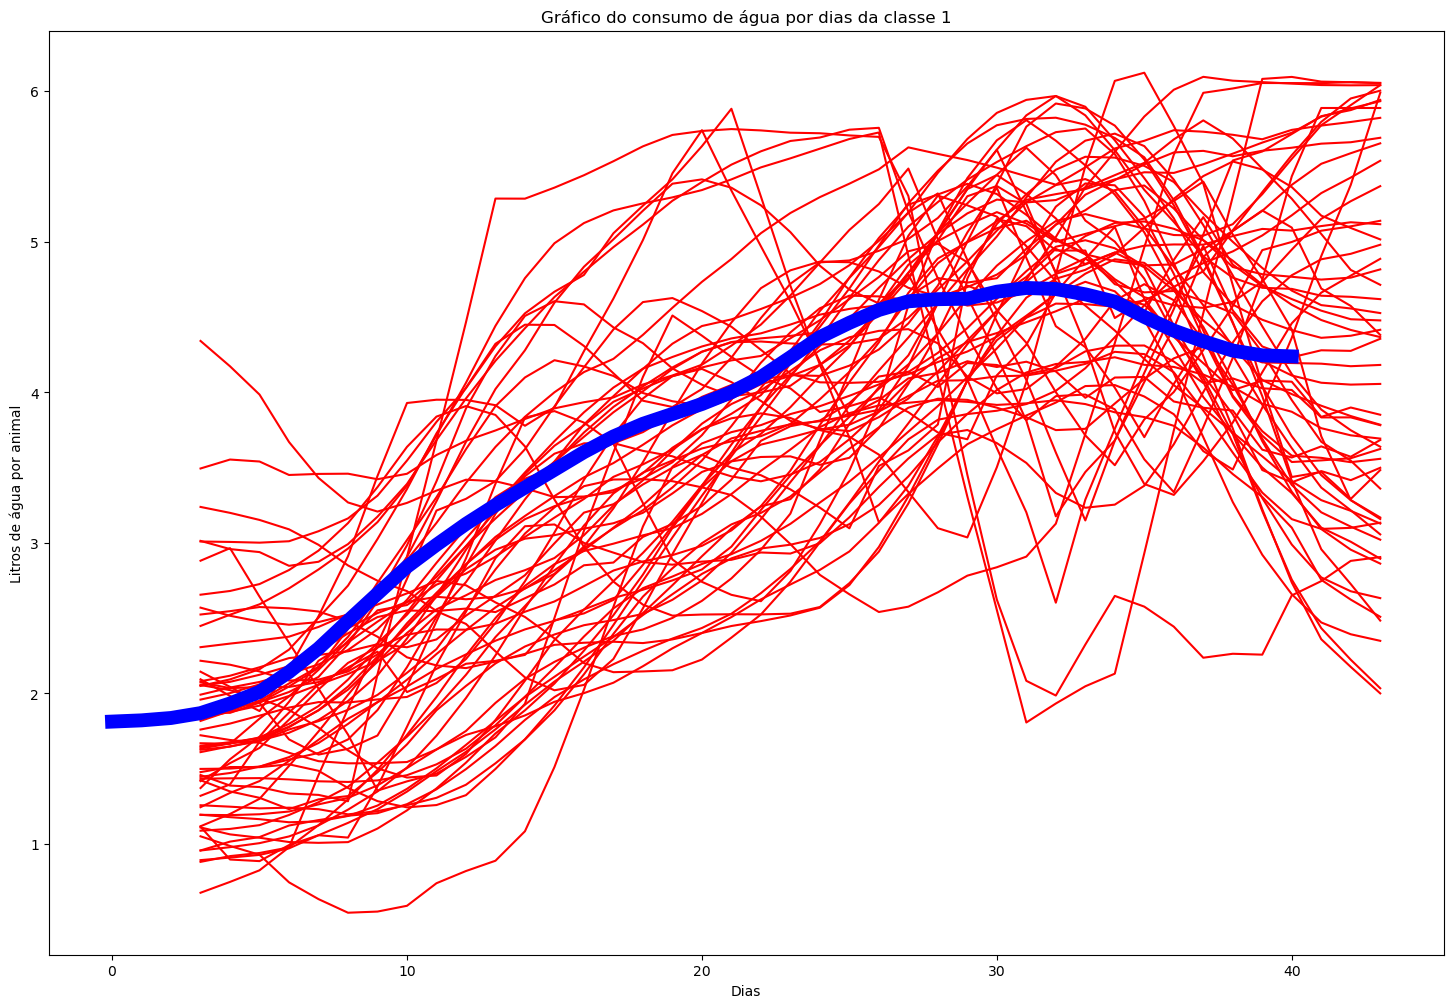

In [84]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_1.index:
     sns.lineplot(dados_classe_1.loc[indice], color = "r")
     
sns.lineplot(centroides[0], linewidth = 10, color = "b")
plt.title("Gráfico do consumo de água por dias da classe 1")    
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


###### Classe 1:

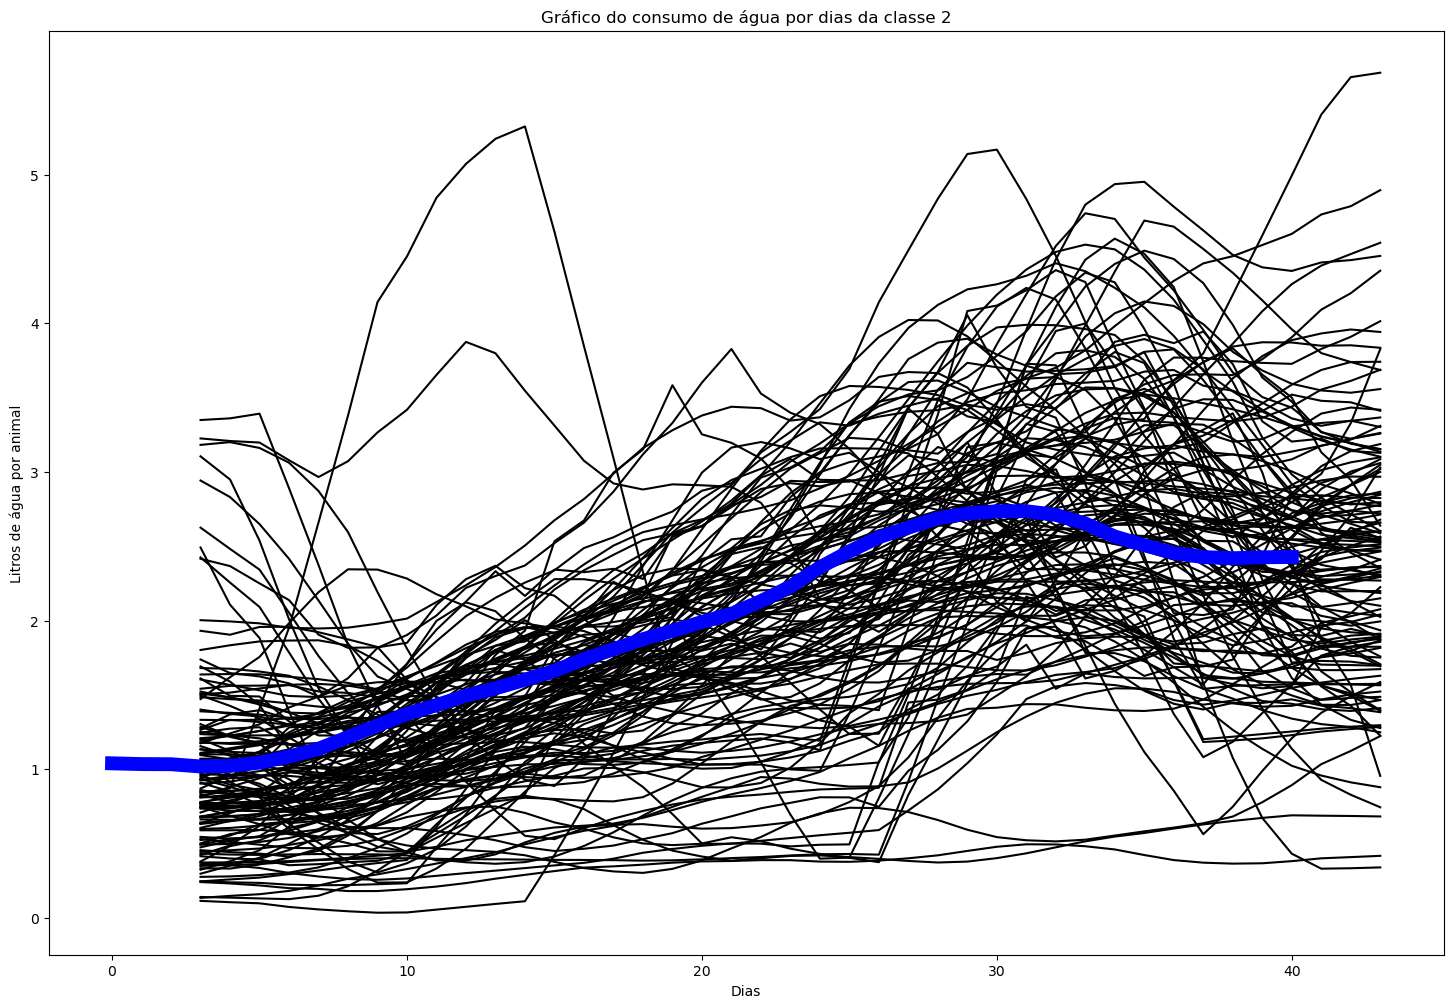

In [85]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_2.index:
     sns.lineplot(dados_classe_2.loc[indice], color = "black")

sns.lineplot(centroides[1], linewidth = 10, color = "b")
plt.title("Gráfico do consumo de água por dias da classe 2")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


##### Gráfico de dispersão

###### Classe 0

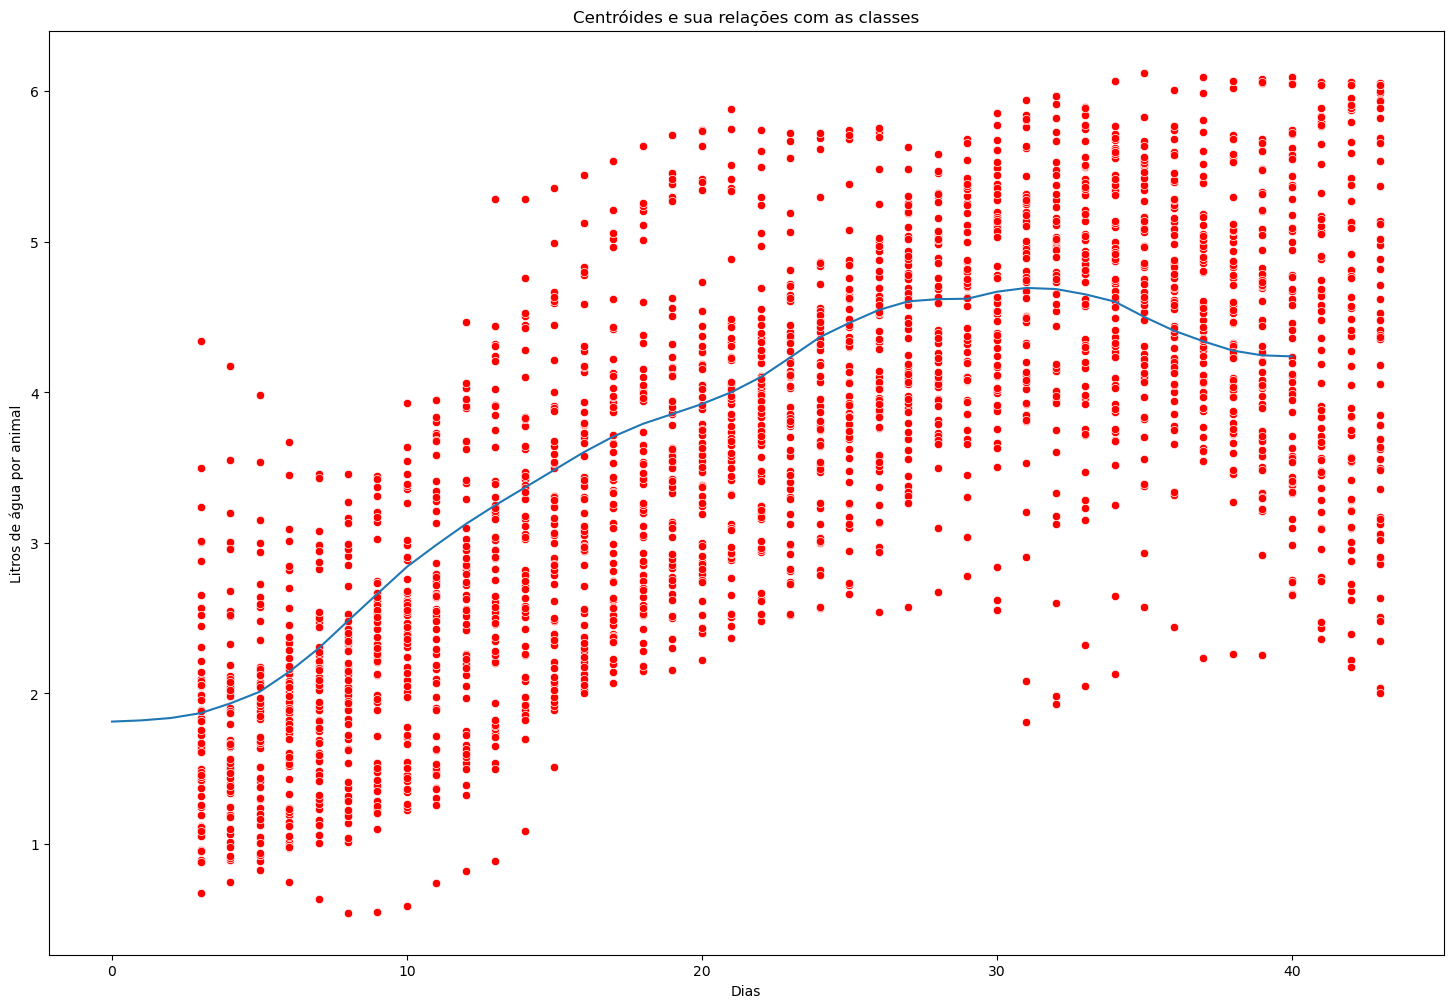

In [86]:
figura = plt.figure(figsize = (18, 12))
plt.plot(centroides[0])
for indice in dados_classe_1.index:
     sns.scatterplot(dados_classe_1.loc[indice], color = "r")
plt.title("Centróides e sua relações com as classes")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()

###### Classe 1:

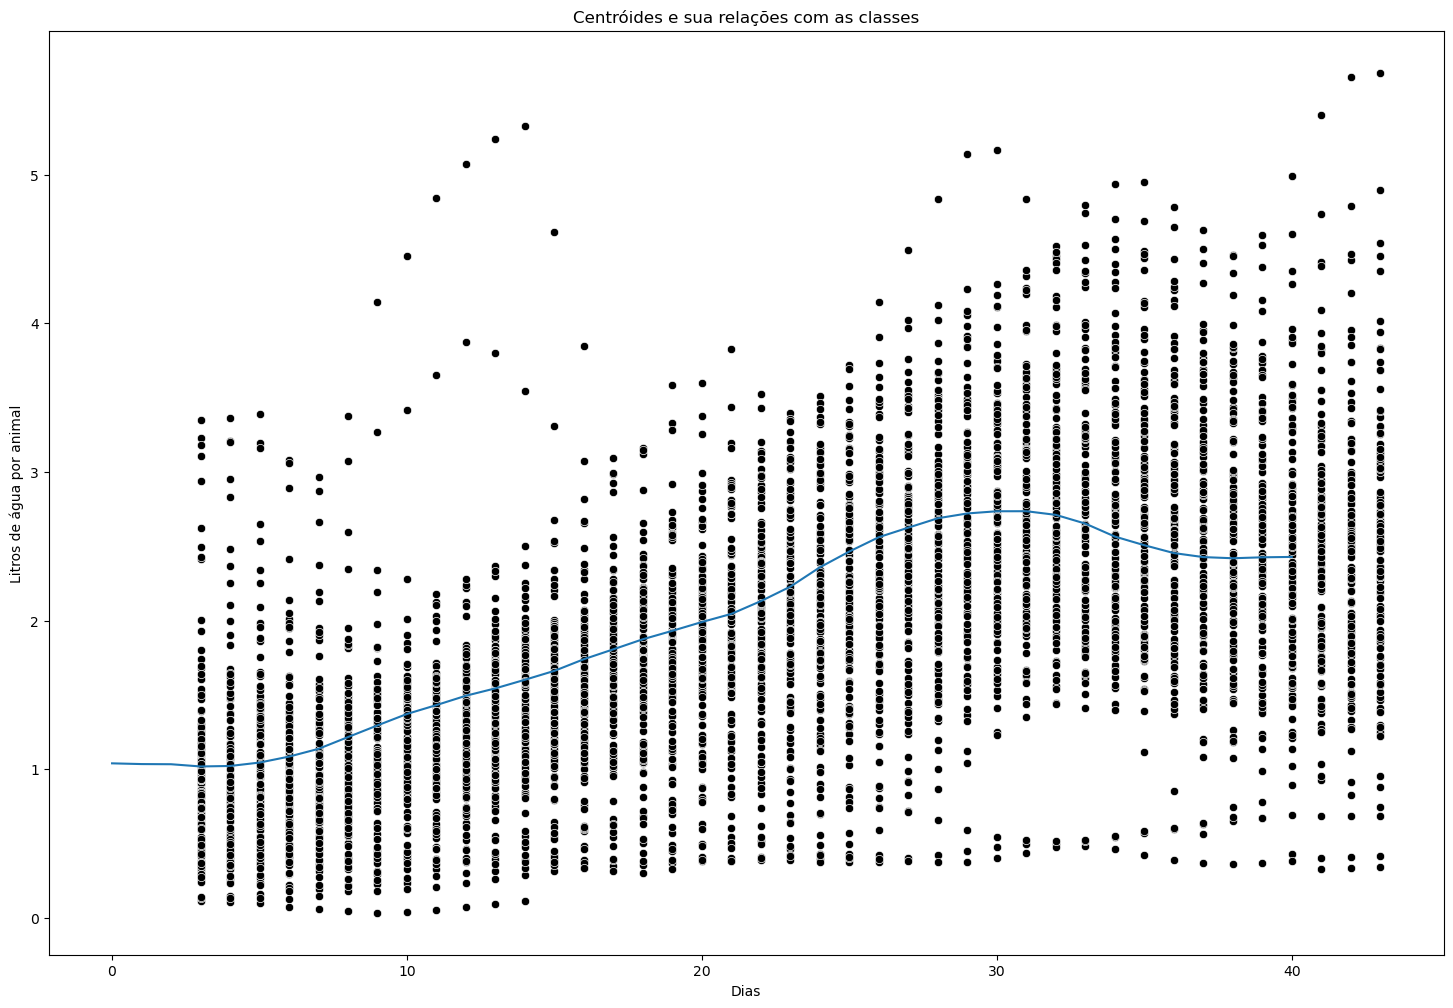

In [87]:
figura = plt.figure(figsize = (18, 12))
plt.plot(centroides[1])
for indice in dados_classe_2.index:
     sns.scatterplot(dados_classe_2.loc[indice], color = "black")
plt.title("Centróides e sua relações com as classes")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()

## Parte 2

### Importando o dataset

In [88]:
df_lotes_filtrados_raw = pd.read_csv(filepath_or_buffer = "./datasets/raw/Lots_filtered.csv", sep = ",")

#### Mostrado um exemplo do dataframe

In [89]:
df_lotes_filtrados_raw.sample(10)

Unnamed: 0  lot_id  total_input  mortality  input_age  output_age  \
28           30  529206         6850   1.868613       21.0        65.0   
23           25  783289         6446   2.637294       21.0        85.0   
113         143  339083         1983   0.756430       21.0        59.0   
125         190  562446        10602   1.905301       21.0        69.0   
177         304  569704         3217   5.688530       21.0        83.0   
101         121  586886         4172   2.013423       21.0        71.0   
151         218  516748         5191   1.464072       21.0        70.0   
132         199  452725         2181   2.292526       21.0        67.0   
70           84  474020         4076   3.287537       21.0        70.0   
46           48  436332         5454   1.760176       21.0        67.0   

     input_weight  output_weight  daily_weight_gain  daily_feed_per_animal  \
28       7.568261      22.717178           0.344294               0.477097   
23       7.548875      34.863362           0.426789               0.589846   
113      7.913348      22.377896           0.380646               0.547189   
125      7.671649      21.873178           0.295865               0.418470   
177      7.321355      22.714469           0.248276               0.000425   
101      7.755328      24.286057           0.330615               0.472603   
151      7.600927      23.124145           0.316800               0.447424   
132      7.729693      22.982661           0.331586               0.494002   
70       7.762112      22.245789           0.295585               0.413806   
46       7.712609      22.442161           0.320208               0.454907   

     adjusted_feed_conversion_ratio  days_in_stage  
28                         1.408555             45  
23                         1.283423             65  
113                        1.463749             39  
125                        1.445661             54  
177                        0.024568             94  
101                        1.436607             51  
151                        1.431079             50  
132                        1.509987             47  
70                         1.427498             50  
46                         1.446241             47

### Renomeando as colunas do dataframe

#### Lista com as colunas

In [90]:
colunas_renomear = {
    "lot_id" : "id_lote",
    "total_input" : "qtd_animal_inicial",
    "mortality" : "mortalidade",
    "input_age" : "idade_inicial",
    "output_age" : "idade_final",
    "input_weight" : "peso_inicial",
    "output_weight" : "peso_final",
    "daily_weight_gain" : "ganho_peso_diario",
    "daily_feed_per_animal" : "alimento_diario_animal",
    "adjusted_feed_conversion_ratio" : "proporcao_alimento_ajustada",
    "days_in_stage" : "dias_no_galpao"
}

#### Renomeando

In [91]:
df_lotes_filtrados_processed = df_lotes_filtrados_raw.rename(columns = colunas_renomear)

### Limpando o dataframe

#### Excluido coluna *Unnamed: 0*

In [92]:
df_lotes_filtrados_processed = df_lotes_filtrados_processed.drop(columns = ["Unnamed: 0"])

In [93]:
df_lotes_filtrados_processed.sample(10)

id_lote  qtd_animal_inicial  mortalidade  idade_inicial  idade_final  \
113   339083                1983     0.756430           21.0         59.0   
137   546951                2419     2.108309           21.0         67.0   
103   637194                4147     2.580178           21.0         71.0   
6     640128                5987     6.747954           21.0         92.0   
33    642729                6749     1.911394           21.0         71.0   
78    583161                3487     2.093490           21.0         65.0   
1     542538                6243     3.315714           21.0         86.0   
70    474020                4076     3.287537           21.0         70.0   
118   396675                1766     1.642129           21.0         64.0   
117   389412                1722     4.065041           21.0         67.0   

     peso_inicial  peso_final  ganho_peso_diario  alimento_diario_animal  \
113      7.913348   22.377896           0.380646                0.547189   
137      7.358280   22.914358           0.338176                0.495906   
103      7.578915   24.937500           0.347172                0.357030   
6        7.354172   22.491347           0.213200                0.363773   
33       7.707450   25.474003           0.355331                0.282538   
78       7.669670   22.677797           0.341094                0.462933   
1        7.655272   24.382962           0.257349                0.287582   
70       7.762112   22.245789           0.295585                0.413806   
118      7.593488   22.781923           0.353219                0.466991   
117      7.265075   22.455266           0.330222                0.480708   

     proporcao_alimento_ajustada  dias_no_galpao  
113                     1.463749              39  
137                     1.487271              47  
103                     1.029020              51  
6                       1.731341              72  
33                      0.790399              51  
78                      1.380425              45  
1                       1.123649              66  
70                      1.427498              50  
118                     1.344279              44  
117                     1.481162              47

#### Eliminando valores faltantes

##### Verificando os valores faltantes por coluna

In [94]:
df_lotes_filtrados_processed.isna().sum()

id_lote                         0
qtd_animal_inicial              0
mortalidade                     0
idade_inicial                   0
idade_final                     0
peso_inicial                    0
peso_final                      0
ganho_peso_diario               0
alimento_diario_animal         12
proporcao_alimento_ajustada    12
dias_no_galpao                  0
dtype: int64

##### Substituindo os valores faltantes pela mediana da coluna

###### Coluna *alimento_diario_animal*

In [95]:
mediana = df_lotes_filtrados_processed["alimento_diario_animal"].median()
mediana

0.45562833739088326

In [96]:
df_lotes_filtrados_processed["alimento_diario_animal"] = df_lotes_filtrados_processed["alimento_diario_animal"].fillna(mediana)
df_lotes_filtrados_processed["alimento_diario_animal"].isna().sum()

0

###### Coluna *proporcao_alimento_ajustada*

In [97]:
mediana = df_lotes_filtrados_processed["proporcao_alimento_ajustada"].median()
mediana

1.4212981096053308

In [98]:
df_lotes_filtrados_processed["proporcao_alimento_ajustada"] = df_lotes_filtrados_processed["proporcao_alimento_ajustada"].fillna(mediana)
df_lotes_filtrados_processed["proporcao_alimento_ajustada"].isna().sum()

0

#### Eliminando outliers

In [99]:
colunas = [
    "qtd_animal_inicial",
    "mortalidade",
    "idade_inicial",
    "idade_final",
    "peso_inicial",
    "peso_final",
    "ganho_peso_diario",
    "alimento_diario_animal",
    "proporcao_alimento_ajustada"
]

/tmp/ipykernel_48877/1182104622.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixos = plt.subplot(3, 3, i)


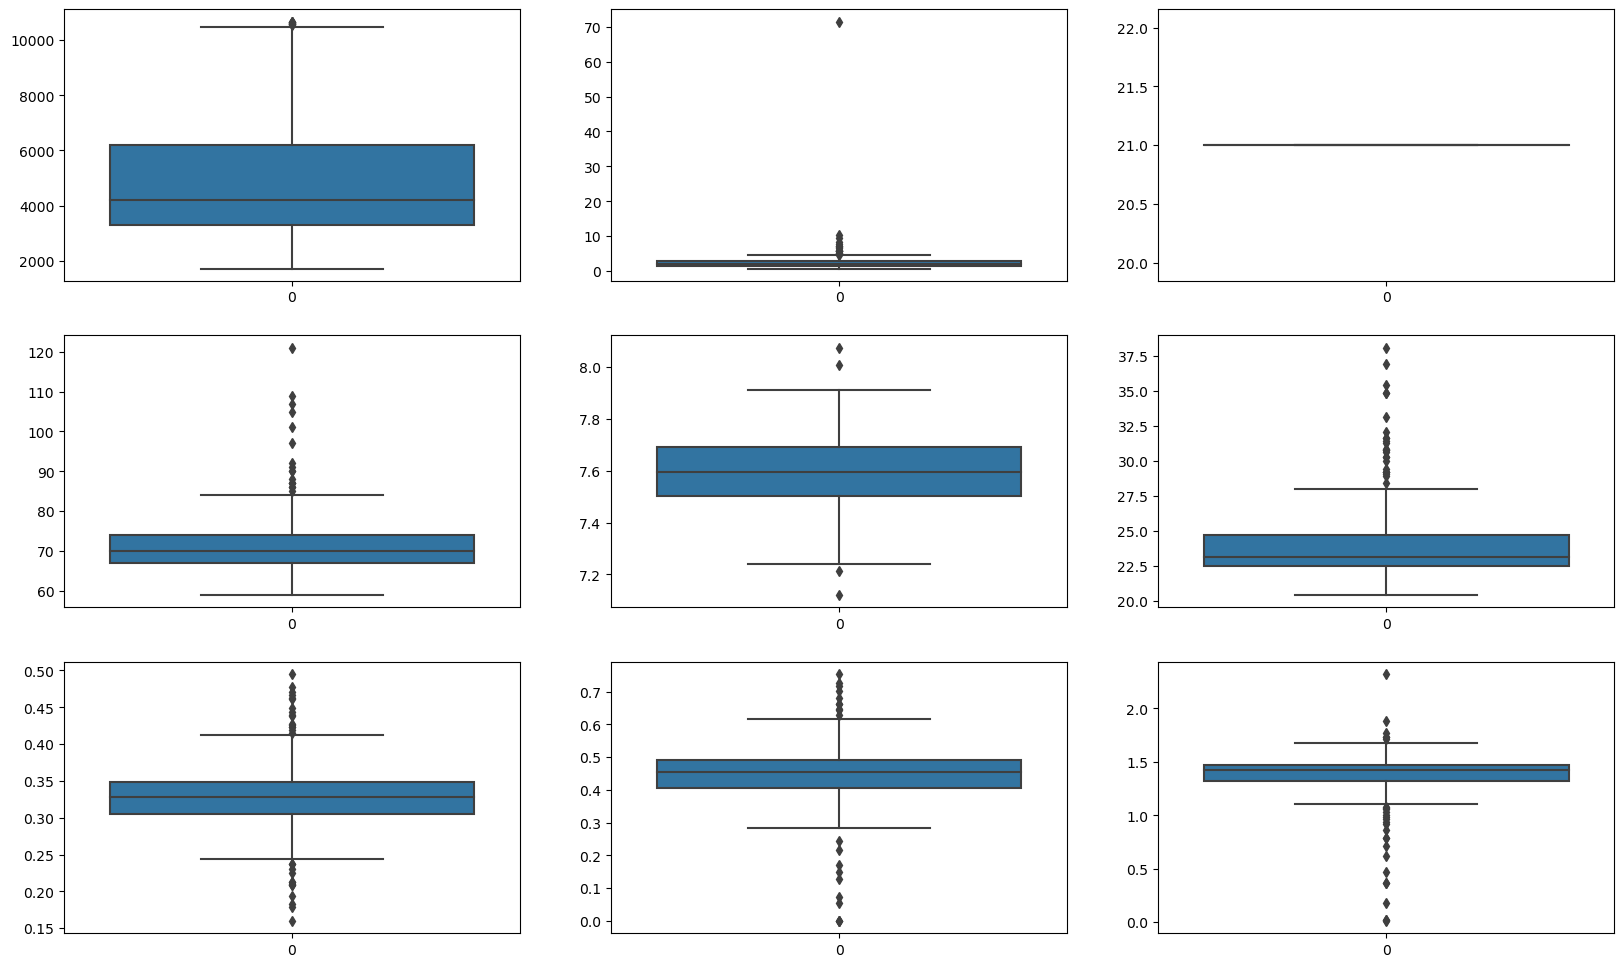

In [100]:
figura = plt.subplots(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.boxplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1

plt.show()

##### Quantidade de linhas do dataframe

In [101]:
df_lotes_filtrados_processed.shape[0]

188

##### Quantidade de outliers por coluna

In [102]:
limites_inferiores = []
limites_superiores = []
interquartis = []

In [103]:
for coluna in colunas:
    quartil1 = np.percentile(df_lotes_filtrados_processed[coluna], 25, method = "midpoint")
    quartil3 = np.percentile(df_lotes_filtrados_processed[coluna], 75, method = "midpoint")
    interquartil = quartil3 - quartil1
    limite_superior = quartil3 + (1.5 * interquartil)
    limite_inferior = quartil1 - (1.5 * interquartil)
    limites_inferiores.append(limite_inferior)
    limites_superiores.append(limite_superior)
    interquartis.append(interquartil)
    print(coluna)
    print("1ro quartil: ", quartil1, "\n3ro quartil: ", quartil3, "\nIQR: ", interquartil)
    print("limite inferior: ", limite_inferior, "\nLimite Superior: ", limite_superior)
    print("Valor mínimo: ", df_lotes_filtrados_processed[coluna].min())
    print("Valor máximo: ", df_lotes_filtrados_processed[coluna].max())
    print("Desvio padrão: ", df_lotes_filtrados_processed[coluna].std(), "\n\n")

qtd_animal_inicial
1ro quartil:  3294.0 
3ro quartil:  6206.0 
IQR:  2912.0
limite inferior:  -1074.0 
Limite Superior:  10574.0
Valor mínimo:  1708
Valor máximo:  10673
Desvio padrão:  2121.7376068437197 


mortalidade
1ro quartil:  1.4969500077060975 
3ro quartil:  2.783311199645861 
IQR:  1.2863611919397635
limite inferior:  -0.4325917802035477 
Limite Superior:  4.7128529875555065
Valor mínimo:  0.7173601147776184
Valor máximo:  71.43340666779488
Desvio padrão:  5.276176102452431 


idade_inicial
1ro quartil:  21.0 
3ro quartil:  21.0 
IQR:  0.0
limite inferior:  21.0 
Limite Superior:  21.0
Valor mínimo:  21.0
Valor máximo:  21.0
Desvio padrão:  0.0 


idade_final
1ro quartil:  67.0 
3ro quartil:  74.0 
IQR:  7.0
limite inferior:  56.5 
Limite Superior:  84.5
Valor mínimo:  59.0
Valor máximo:  121.0
Desvio padrão:  9.065850233688261 


peso_inicial
1ro quartil:  7.50076416166673 
3ro quartil:  7.69058781444755 
IQR:  0.18982365278082014
limite inferior:  7.2160286824955 
Limite Su

In [104]:
print("Quantidade total de linhas", df_lotes_filtrados_processed.shape[0])

for i, coluna in enumerate(colunas):
    linhas_a_apagar = 0
    linhas_a_apagar += df_lotes_filtrados_processed[(df_lotes_filtrados_processed[coluna] > limites_superiores[i])].shape[0]
    linhas_a_apagar += df_lotes_filtrados_processed[(df_lotes_filtrados_processed[coluna] < limites_inferiores[i])].shape[0]
    print("Quantidade de linhas para apagar da coluna", coluna, ":", linhas_a_apagar)

Quantidade total de linhas 188
Quantidade de linhas para apagar da coluna qtd_animal_inicial : 7
Quantidade de linhas para apagar da coluna mortalidade : 16
Quantidade de linhas para apagar da coluna idade_inicial : 0
Quantidade de linhas para apagar da coluna idade_final : 17
Quantidade de linhas para apagar da coluna peso_inicial : 4
Quantidade de linhas para apagar da coluna peso_final : 25
Quantidade de linhas para apagar da coluna ganho_peso_diario : 28
Quantidade de linhas para apagar da coluna alimento_diario_animal : 20
Quantidade de linhas para apagar da coluna proporcao_alimento_ajustada : 27


A quantidade de linhas que serão apagadas: 7, 16, 17, 4, 25, 28, 20, 27 respectivamente das colunas *qtd_animal_inicial*, *mortalidade*, *idade_final*, *peso_inicial*, *peso_final*, *ganho_peso_diario*, *alimento_diario_animal*, *proporcao_alimento_ajustada* é um número muito alto. Isso iria gerar um desbalanço nos dados, ou até uma diminuição drástica, desde nós não sabemos se há linhas que se coincidem ou se não há nenhum coincidência.

**Foi decidido:**
- eliminar os valores máximos das colunas: *mortalidade*, *peso_final*, *idade_final*;
- e eliminar os valore mínimos das colunas: *ganho_peso_diario*, *alimento_diario_animal*, *proporcao_alimento_ajustada*.

In [105]:
# mortalidade
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["mortalidade"] == df_lotes_filtrados_processed["mortalidade"].max())]

# peso_final
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["peso_final"] == df_lotes_filtrados_processed["peso_final"].max())]

# idade_final
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["idade_final"] == df_lotes_filtrados_processed["idade_final"].max())]

# ganho_peso_diario
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["ganho_peso_diario"] == df_lotes_filtrados_processed["ganho_peso_diario"].min())]

# alimento_diario_animal
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["alimento_diario_animal"] == df_lotes_filtrados_processed["alimento_diario_animal"].min())]

# proporcao_alimento_ajustada
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["proporcao_alimento_ajustada"] == df_lotes_filtrados_processed["proporcao_alimento_ajustada"].min())]

In [106]:
print("Quantidade atual de linhas:", df_lotes_filtrados_processed.shape[0])

Quantidade atual de linhas: 182


Como podemos ver, 6 linhas foram perdidas no processo.

Essa perda poderia ser muito maior e mais expressiva, caso tivessemos excluido todos os outliers de uma vez.

### Verificando o comportamento do dataset com o scatterplot

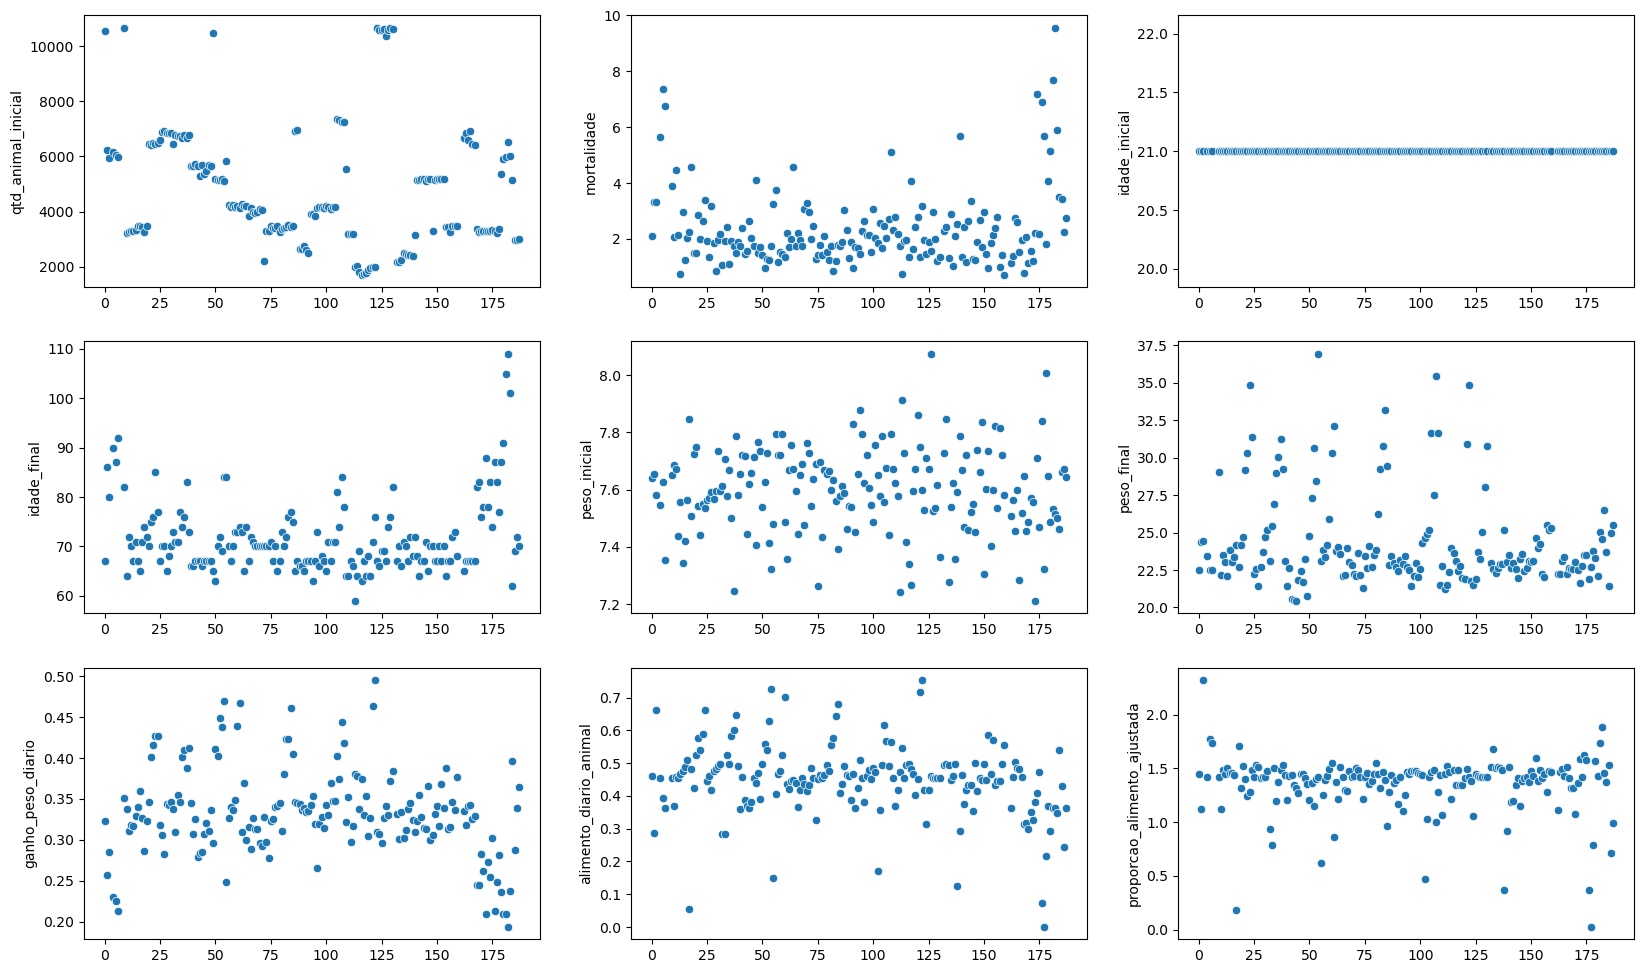

In [107]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.scatterplot(data = df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

Não é possível identificar nenhuma divisão clara de classes utilizando somente o scatterplot.

Mas é possível notar que os dados não estão espalhados de maneira uniforme, eles estão concentrados em certos pontos de cada gráfico.

Sendo *idade_inicial* linear e constante.

*qtd_animal_inicial* difusa, com várias aglomerações pelo gráfico, algumas das aglomerações, quando juntas, formam uma certa continuidade. 

*peso_inicial* a primeira vista é uniformemente espalhados, mas podemos notar que, em certos pontos, há pequenas aglomerações.

### Verificando o comportamento do dataset com histograma, distribuição normal e gráfico de linhas

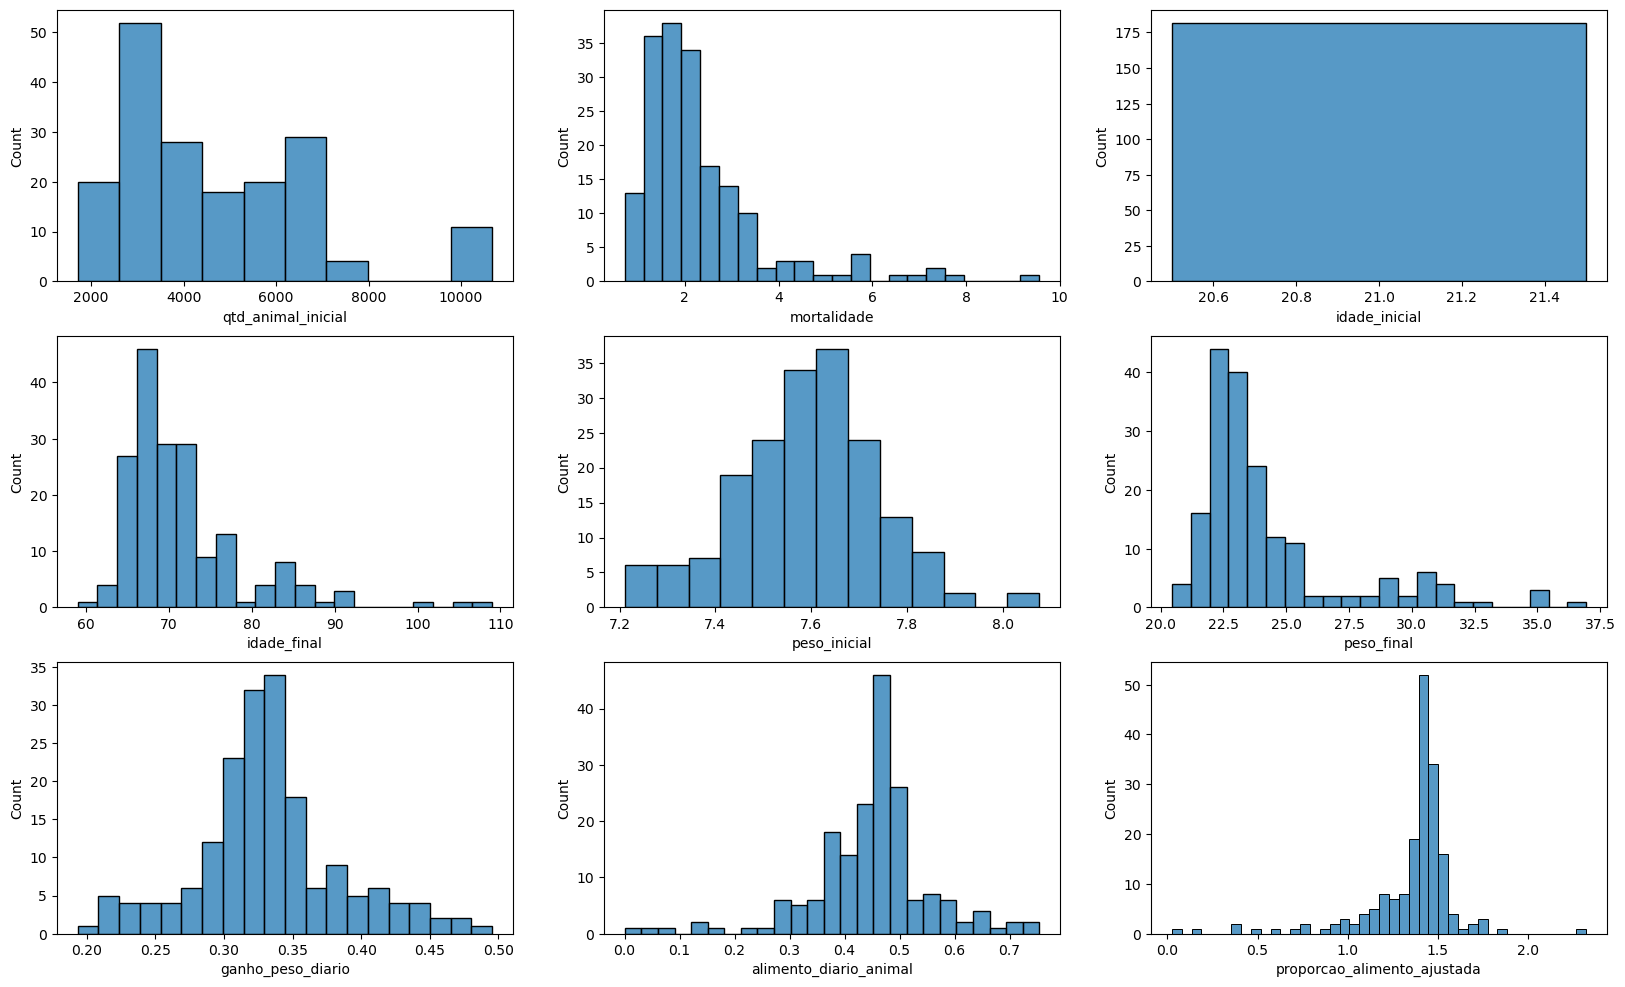

In [108]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.histplot(data = df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

/tmp/ipykernel_48877/2574138922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
/tmp/ipykernel_48877/2574138922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
/tmp/ipykernel_48877/2574138

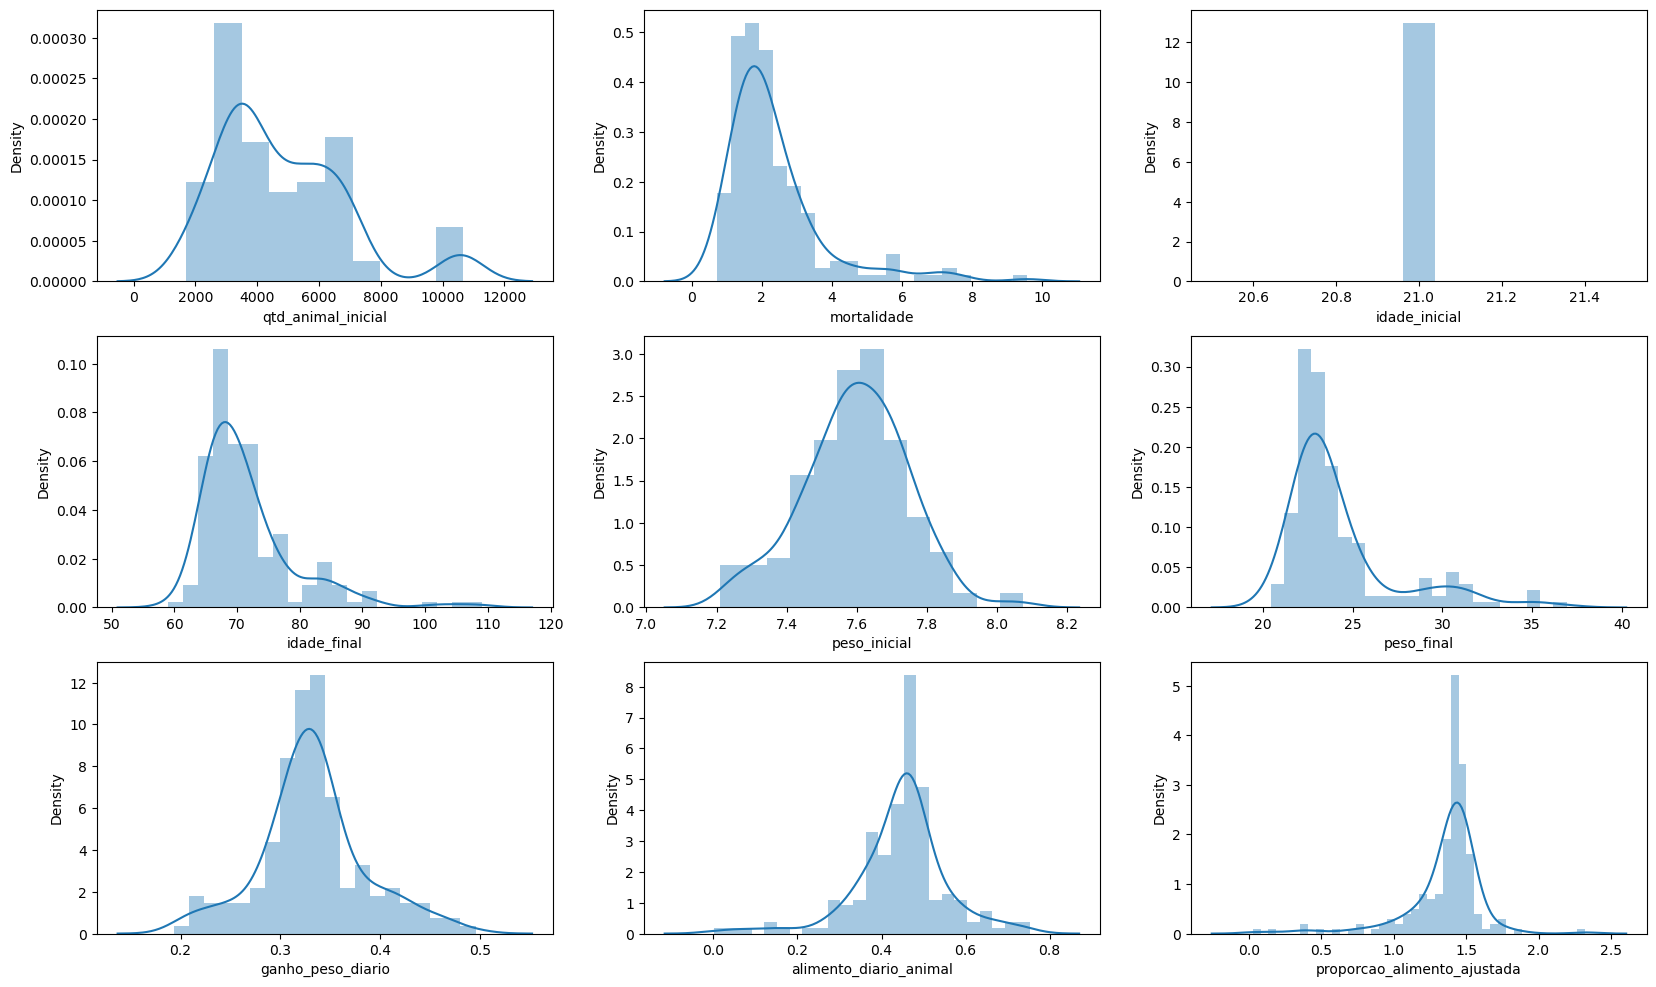

In [109]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

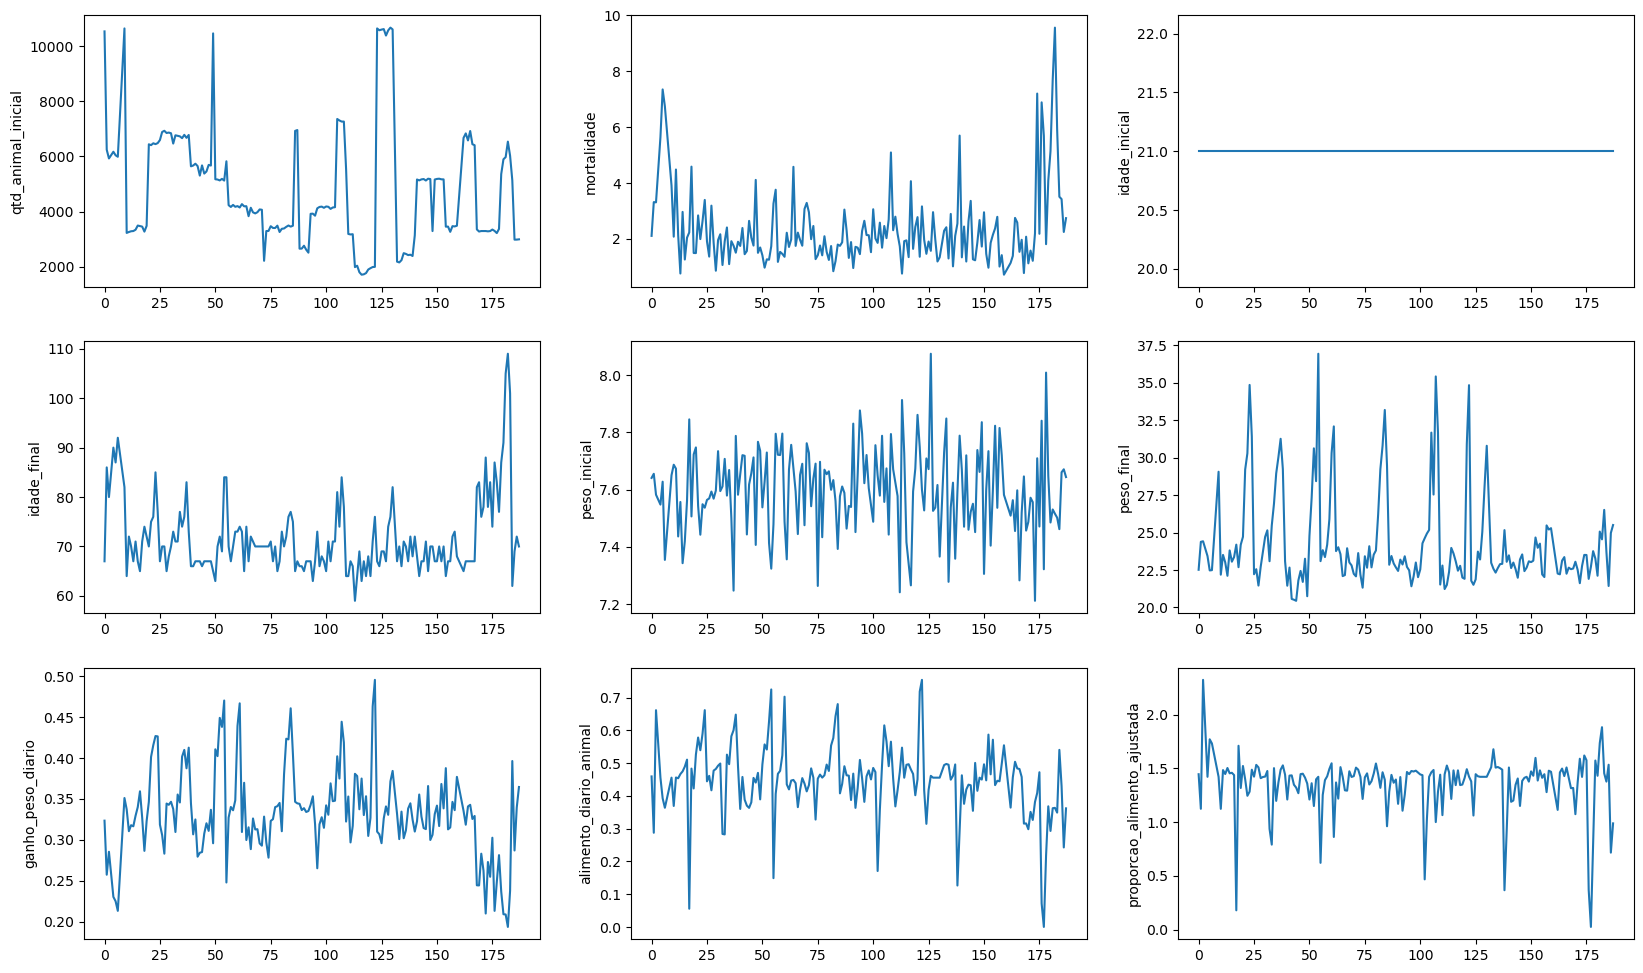

In [110]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.lineplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

Podemos notar, com os três gráficos anteriores, que as colunas de fato não são contínuas, nem se comportam de forma contínua (como uma função afim, quadrática etc), seus valores estão aglomerados sobre um certo pontos e sua distribuição normal varia muito, com colunas com dois picos de distribuição e colunas com alta amplitude, mas baixa frequência.

### Salvando o dataset atual em um arquivo .pkl

In [111]:
df_lotes_filtrados_processed.to_pickle("./datasets/processed/lotes-filtrados.pkl")

### Testando os parâmetros do Kmeans

##### Lista auxiliar para a escolha dos melhores parâmetros

In [112]:
qtd_de_rodadas = [i for i in range(10, 130, 10)]
qtd_de_rodadas.append("auto")
print("Conteúdo da lista: ", qtd_de_rodadas)
print("Seu tipo é: ", type(qtd_de_rodadas))

Conteúdo da lista:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 'auto']
Seu tipo é:  <class 'list'>


##### Atribuindo a quantidade de clusters que serão utilizados

In [113]:
nro_de_cluster = [i for i in range(2, 13)]
print("Conteúdo da lista: ", nro_de_cluster)
print("Seu tipo é: ", type(nro_de_cluster))

Conteúdo da lista:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Seu tipo é:  <class 'list'>


##### Quantidade máxima de iterações

In [114]:
maximo_de_iteracoes = 1200

##### Realizando os testes

In [115]:
for nro_cluster in nro_de_cluster:
    for rodada in qtd_de_rodadas:
        kmeans = KMeans(
                        n_clusters = nro_cluster,
                        n_init = rodada,
                        random_state = 50, # deixando a SEED manual para futuras observacoes
                        max_iter = maximo_de_iteracoes
                    )
        kmeans.fit(df_lotes_filtrados_processed)
        
        # usando o silhouette para pegar os score de forma limpa
        score_atual = silhouette_score(df_lotes_filtrados_processed, kmeans.labels_)
        
        # salvando os melhores parametros
        if score_atual > melhores_parametros["Score"]:
            melhores_parametros = atualiza_dicionario(melhores_parametros, nro_cluster, rodada, score_atual)
    
melhores_parametros

{'numero_de_clusters': 6,
 'quantidade_de_rodadas': 10,
 'Score': 0.6500475815834467}

Temos então que os melhores parâmetros, para o máximo de 1200 iterações, são:
- 6 Clusters;
- 10 Rodadas;
- 0.6500475815834467 de Score.

##### Realizando a divisão final dos clusters utilizando os melhores parâmetros

In [116]:
kmeans = KMeans(
            n_clusters = melhores_parametros["numero_de_clusters"],
            n_init = melhores_parametros["quantidade_de_rodadas"],
            max_iter = maximo_de_iteracoes,
            random_state = 50 # deixando a SEED manual para futuras observacoes
        )
kmeans.fit(df_lotes_filtrados_processed)

KMeans(max_iter=1200, n_clusters=6, n_init=10, random_state=50)

##### Resultado da previsão

In [117]:
y_predicao = kmeans.predict(df_lotes_filtrados_processed)
print(len(y_predicao))
print(y_predicao)

182
[0 3 3 0 0 0 2 5 5 3 3 3 3 3 0 0 0 0 4 4 4 2 3 3 3 3 3 0 0 0 0 4 4 4 2 2 1
 1 1 5 5 5 5 5 3 3 3 0 0 4 4 2 0 0 0 0 4 4 4 1 1 1 5 5 5 5 5 3 3 3 3 3 3 3
 3 0 0 0 0 4 4 4 4 1 1 1 1 1 5 5 5 5 3 3 3 3 3 3 0 0 0 0 4 4 2 2 5 5 5 5 1
 1 1 5 5 5 5 5 2 2 3 3 3 0 0 0 4 4 5 3 3 3 3 3 0 0 0 1 1 1 5 5 5 5 3 3 3 3
 3 3 0 0 0 0 4 4 5 5 5 5 5 5 1 1 5 5 5 3 3 3 3 0 0 0 0 4 4 2 0 0 0 0]


#### Visualizando as classes e suas ocorrências

In [118]:
classes, quantidade = np.unique(y_predicao, return_counts = True)

for i in range(0, len(classes)):
    print(f"Para a classe {classes[i]}, existem {quantidade[i]} ocorrências.")

Para a classe 0, existem 44 ocorrências.
Para a classe 1, existem 19 ocorrências.
Para a classe 2, existem 10 ocorrências.
Para a classe 3, existem 47 ocorrências.
Para a classe 4, existem 23 ocorrências.
Para a classe 5, existem 39 ocorrências.


Como podemos ver acima, a classe 2 é a menor de todas, com apenas 10 ocorrências.

A classe 1 é a segunda menor, com 19 ocorrências.

A maior classe de todas é a classe 3, com 47 ocorrências. Esse valor é quatro vezes maior que as ocorrências da classe 2.

##### Os centróides

In [119]:
centroides = kmeans.cluster_centers_
centroides

array([[6.19565045e+05, 4.91270455e+03, 2.69701824e+00, 2.10000000e+01,
        7.25000000e+01, 7.65324140e+00, 2.39123713e+01, 3.21809417e-01,
        3.94446983e-01, 1.23336199e+00, 5.41818182e+01],
       [3.39657632e+05, 4.18636842e+03, 2.02455546e+00, 2.10000000e+01,
        6.82105263e+01, 7.61105473e+00, 2.29587369e+01, 3.29250410e-01,
        4.32682393e-01, 1.33497099e+00, 4.82105263e+01],
       [8.59319700e+05, 6.02310000e+03, 3.05209742e+00, 2.10000000e+01,
        8.09000000e+01, 7.56318379e+00, 3.17291373e+01, 4.10676780e-01,
        5.96716268e-01, 1.39975603e+00, 6.09000000e+01],
       [5.15993489e+05, 4.74036170e+03, 2.29322038e+00, 2.10000000e+01,
        6.99574468e+01, 7.57909852e+00, 2.27335368e+01, 3.11856557e-01,
        4.44851119e-01, 1.43732843e+00, 5.01063830e+01],
       [7.42261783e+05, 5.72191304e+03, 2.28050091e+00, 2.10000000e+01,
        7.79130435e+01, 7.55605685e+00, 2.90679715e+01, 3.87038967e-01,
        5.35633288e-01, 1.38861178e+00, 5.83913043e+

#### Separando os clusters

##### Criando uma coluna extra para salvar as classes de cada lote

In [120]:
df_lotes_filtrados_processed["classe"] = kmeans.labels_
df_lotes_filtrados_processed.sample(10)

id_lote  qtd_animal_inicial  mortalidade  idade_inicial  idade_final  \
34    699708                6728     2.407848           21.0         77.0   
48    491363                5668     1.499647           21.0         67.0   
135   525615                2489     2.892728           21.0         71.0   
145   393790                5125     1.268293           21.0         71.0   
170   387776                3292     1.123937           21.0         76.0   
18    610732                3271     4.585754           21.0         74.0   
94    429364                3923     1.452970           21.0         63.0   
125   562446               10602     1.905301           21.0         69.0   
129   720666               10673     1.189918           21.0         76.0   
20    653501                6439     1.490915           21.0         70.0   

     peso_inicial  peso_final  ganho_peso_diario  alimento_diario_animal  \
34       7.579080   26.934741           0.345637                0.525815   
48       7.767149   23.254455           0.336681                0.470216   
135      7.537557   22.633434           0.301918                0.449483   
145      7.550521   23.204071           0.313071                0.354466   
170      7.487151   23.053671           0.283028                0.298338   
18       7.506133   22.689587           0.286480                0.483275   
94       7.876903   22.708497           0.353133                0.509694   
125      7.671649   21.873178           0.295865                0.418470   
129      7.616122   28.041554           0.371371                0.455628   
20       7.747587   24.719262           0.346361                0.526114   

     proporcao_alimento_ajustada  dias_no_galpao  classe  
34                      1.501945              57       4  
48                      1.414080              47       3  
135                     1.512426              51       3  
145                     1.150183              51       5  
170                     1.073559              56       5  
18                      1.710045              54       0  
94                      1.466262              43       5  
125                     1.445661              54       3  
129                     1.421298              56       4  
20                      1.521785              50       0

* dados_classe_1: os dados filtrados que pertencem a classe 0 predita no kmeans

* dados_classe_2: os dados filtrados que pertencem a classe 1 predita no kmeans

* dados_classe_3: os dados filtrados que pertencem a classe 2 predita no kmeans

* dados_classe_4: os dados filtrados que pertencem a classe 3 predita no kmeans

* dados_classe_5: os dados filtrados que pertencem a classe 4 predita no kmeans

* dados_classe_6: os dados filtrados que pertencem a classe 5 predita no kmeans

In [121]:
dados_classe_1 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 0].drop(columns = "classe")
dados_classe_2 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 1].drop(columns = "classe")
dados_classe_3 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 2].drop(columns = "classe")
dados_classe_4 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 3].drop(columns = "classe")
dados_classe_5 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 4].drop(columns = "classe")
dados_classe_6 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 5].drop(columns = "classe")

##### Os nomes das coluna para futura consulta

In [122]:
df_lotes_filtrados_processed.columns

Index(['id_lote', 'qtd_animal_inicial', 'mortalidade', 'idade_inicial',
       'idade_final', 'peso_inicial', 'peso_final', 'ganho_peso_diario',
       'alimento_diario_animal', 'proporcao_alimento_ajustada',
       'dias_no_galpao', 'classe'],
      dtype='object')

#### Gráfico de dispersão (scatterplot)

In [159]:
colunas = [
    "qtd_animal_inicial", "mortalidade", "idade_inicial",
    "idade_final", "peso_inicial", "peso_final", "ganho_peso_diario",
    "alimento_diario_animal", "proporcao_alimento_ajustada",
    "dias_no_galpao"
]

/tmp/ipykernel_48877/2352218893.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.scatterplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")


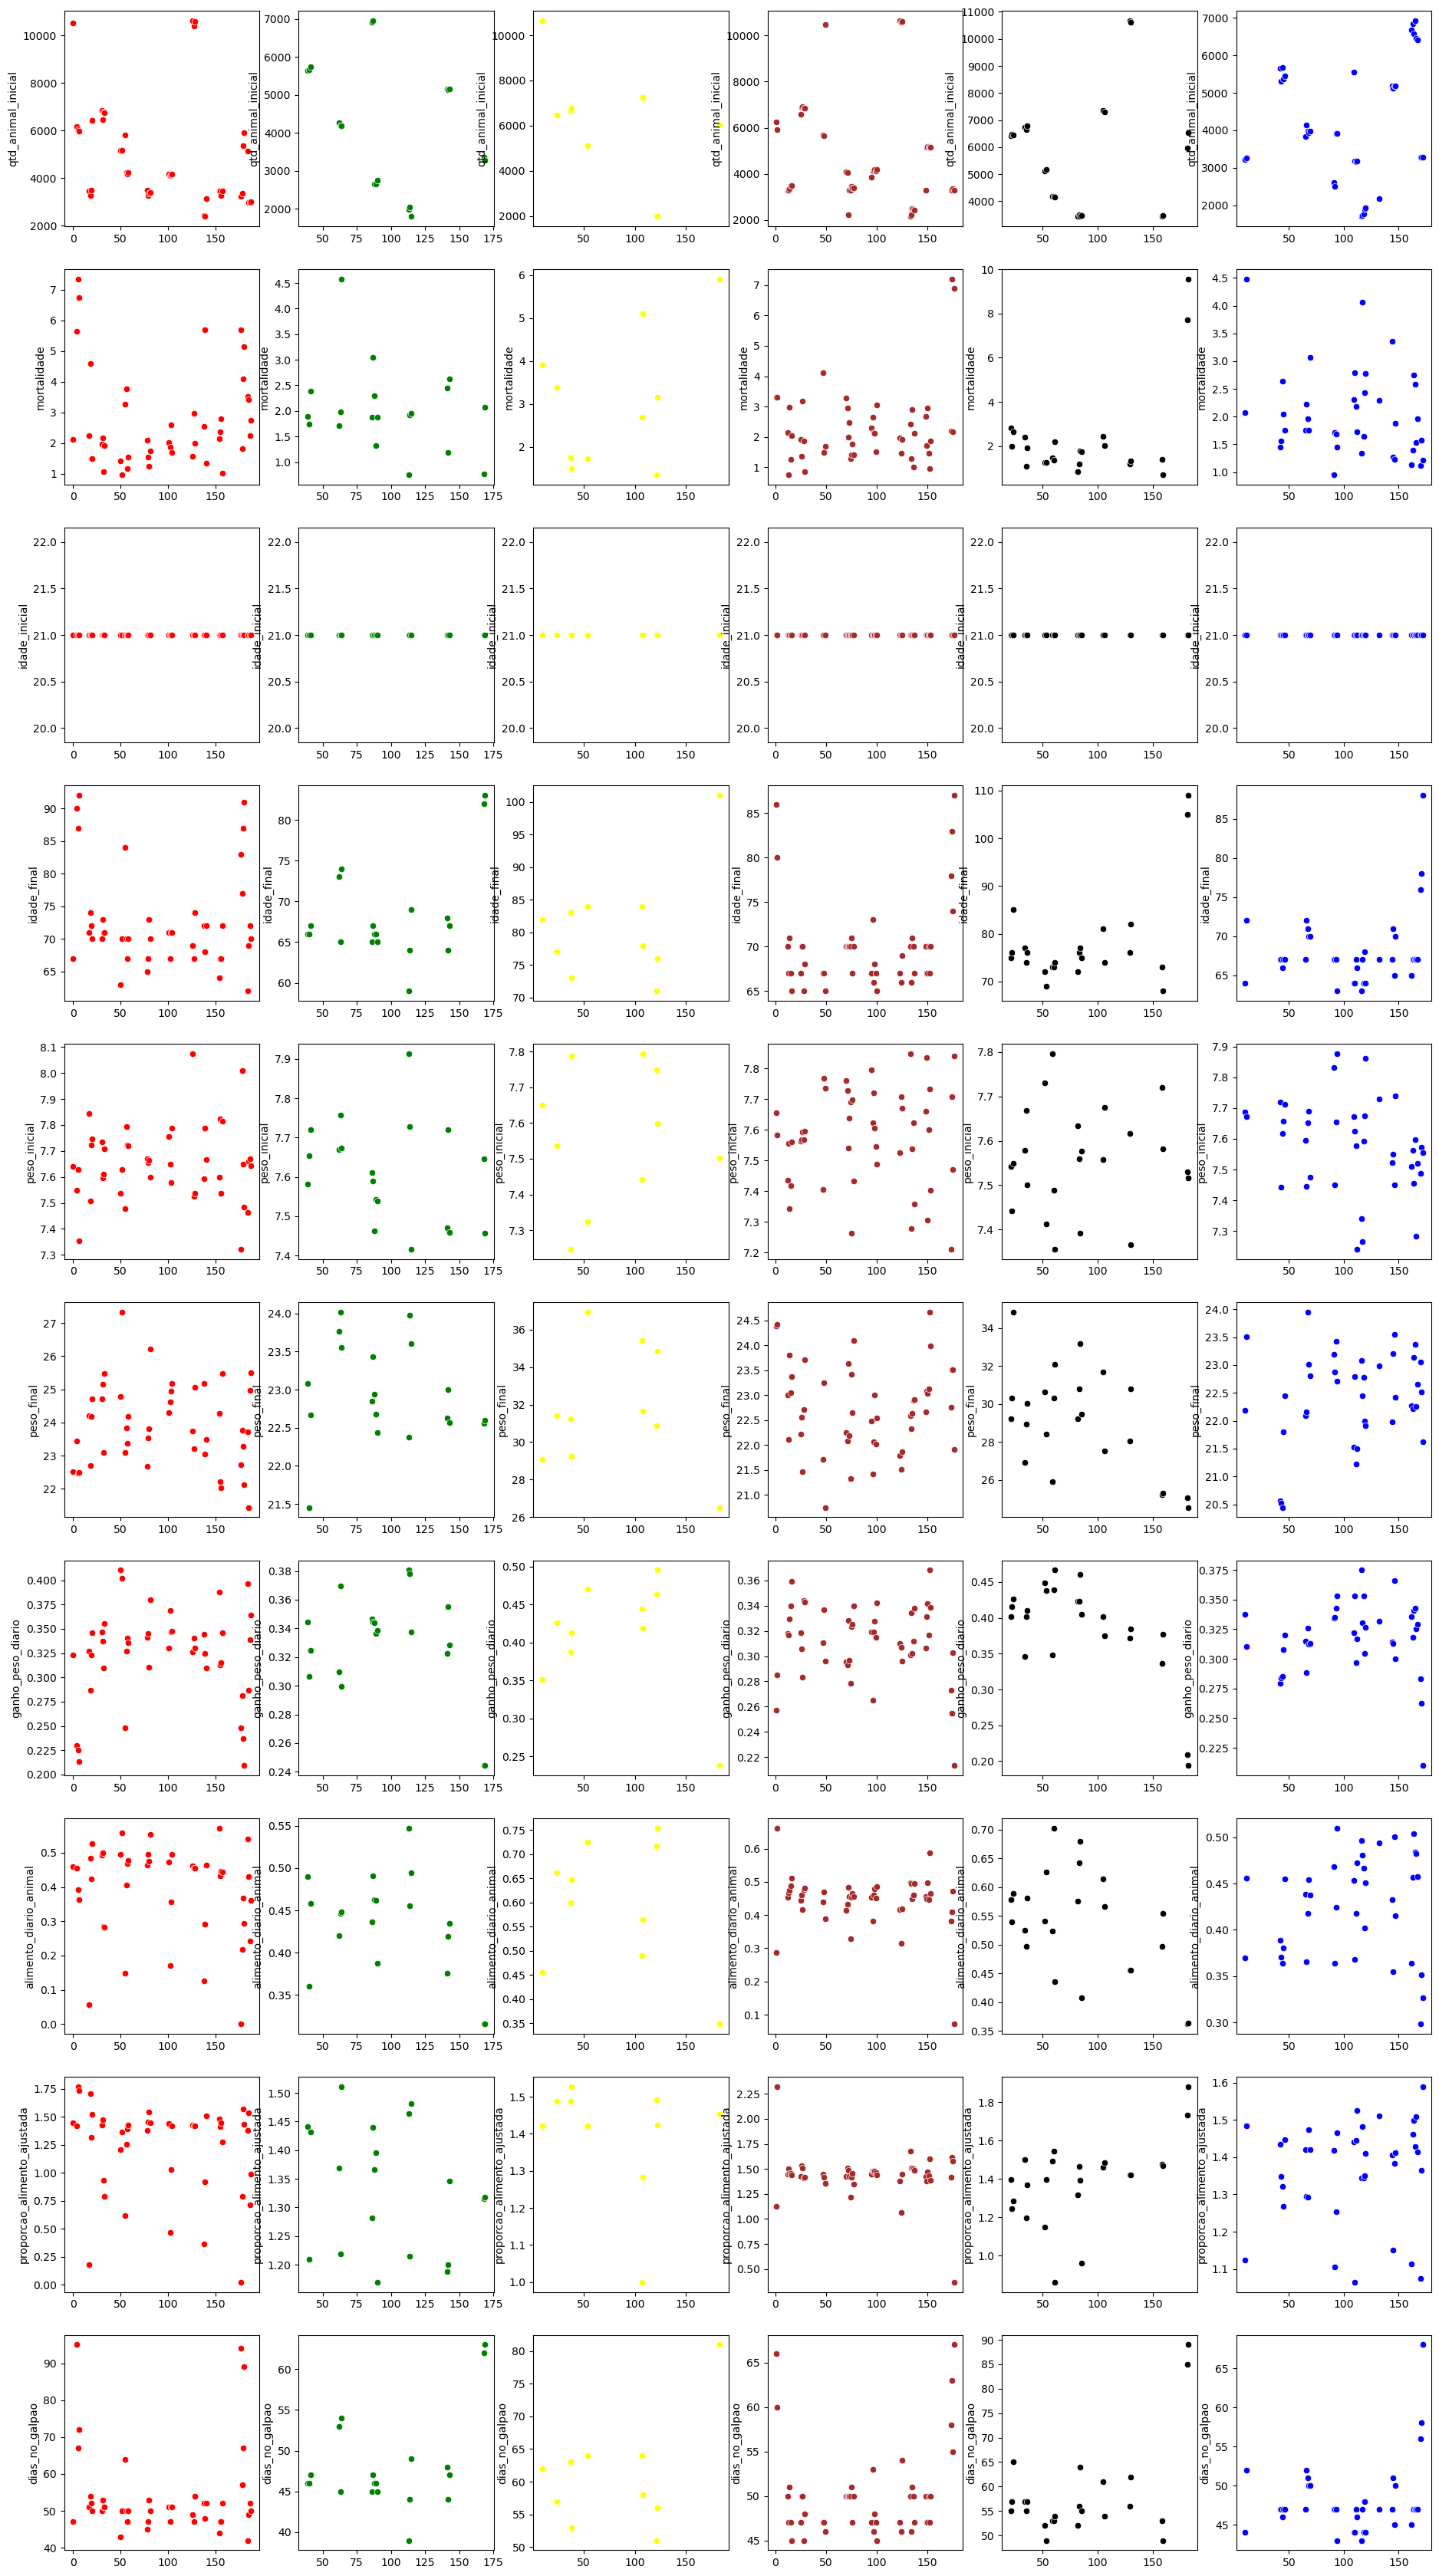

In [156]:
figura = plt.subplots(figsize = (23, 43))
i = 1

for coluna in colunas:
    sns.scatterplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")
    sns.scatterplot(dados_classe_2[coluna], ax = plt.subplot(10, 6, (i+1)), color = "green")
    sns.scatterplot(dados_classe_3[coluna], ax = plt.subplot(10, 6, (i+2)), color = "yellow")
    sns.scatterplot(dados_classe_4[coluna], ax = plt.subplot(10, 6, (i+3)), color = "brown")
    sns.scatterplot(dados_classe_5[coluna], ax = plt.subplot(10, 6, (i+4)), color = "black")
    sns.scatterplot(dados_classe_6[coluna], ax = plt.subplot(10, 6, (i+5)), color = "blue")
    i += 6    

plt.show()

Podemos notar no gráfico acima, que a diferença no valor das ocorrências é gritante.

As classes 0, 3 e 5 têm muito mais ocorr6encias que as classes 1, 2 e 4. Isso gera pontos mais aglomerados e cobrindo mais espaço do gráfico.

De encontro a isso, temos as classes 1, 2 e 4, que com suas poucas ocorrências, seus gráficos têm muito menos pontos, e seus pontos ficam muito mais espaçados.

Podemos notar também que as classes 0, 3, 4 e 5 possue mos maiores valores na maior parte dos dados.

#### Gráfico de linhas

/tmp/ipykernel_48877/2271313970.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.lineplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")


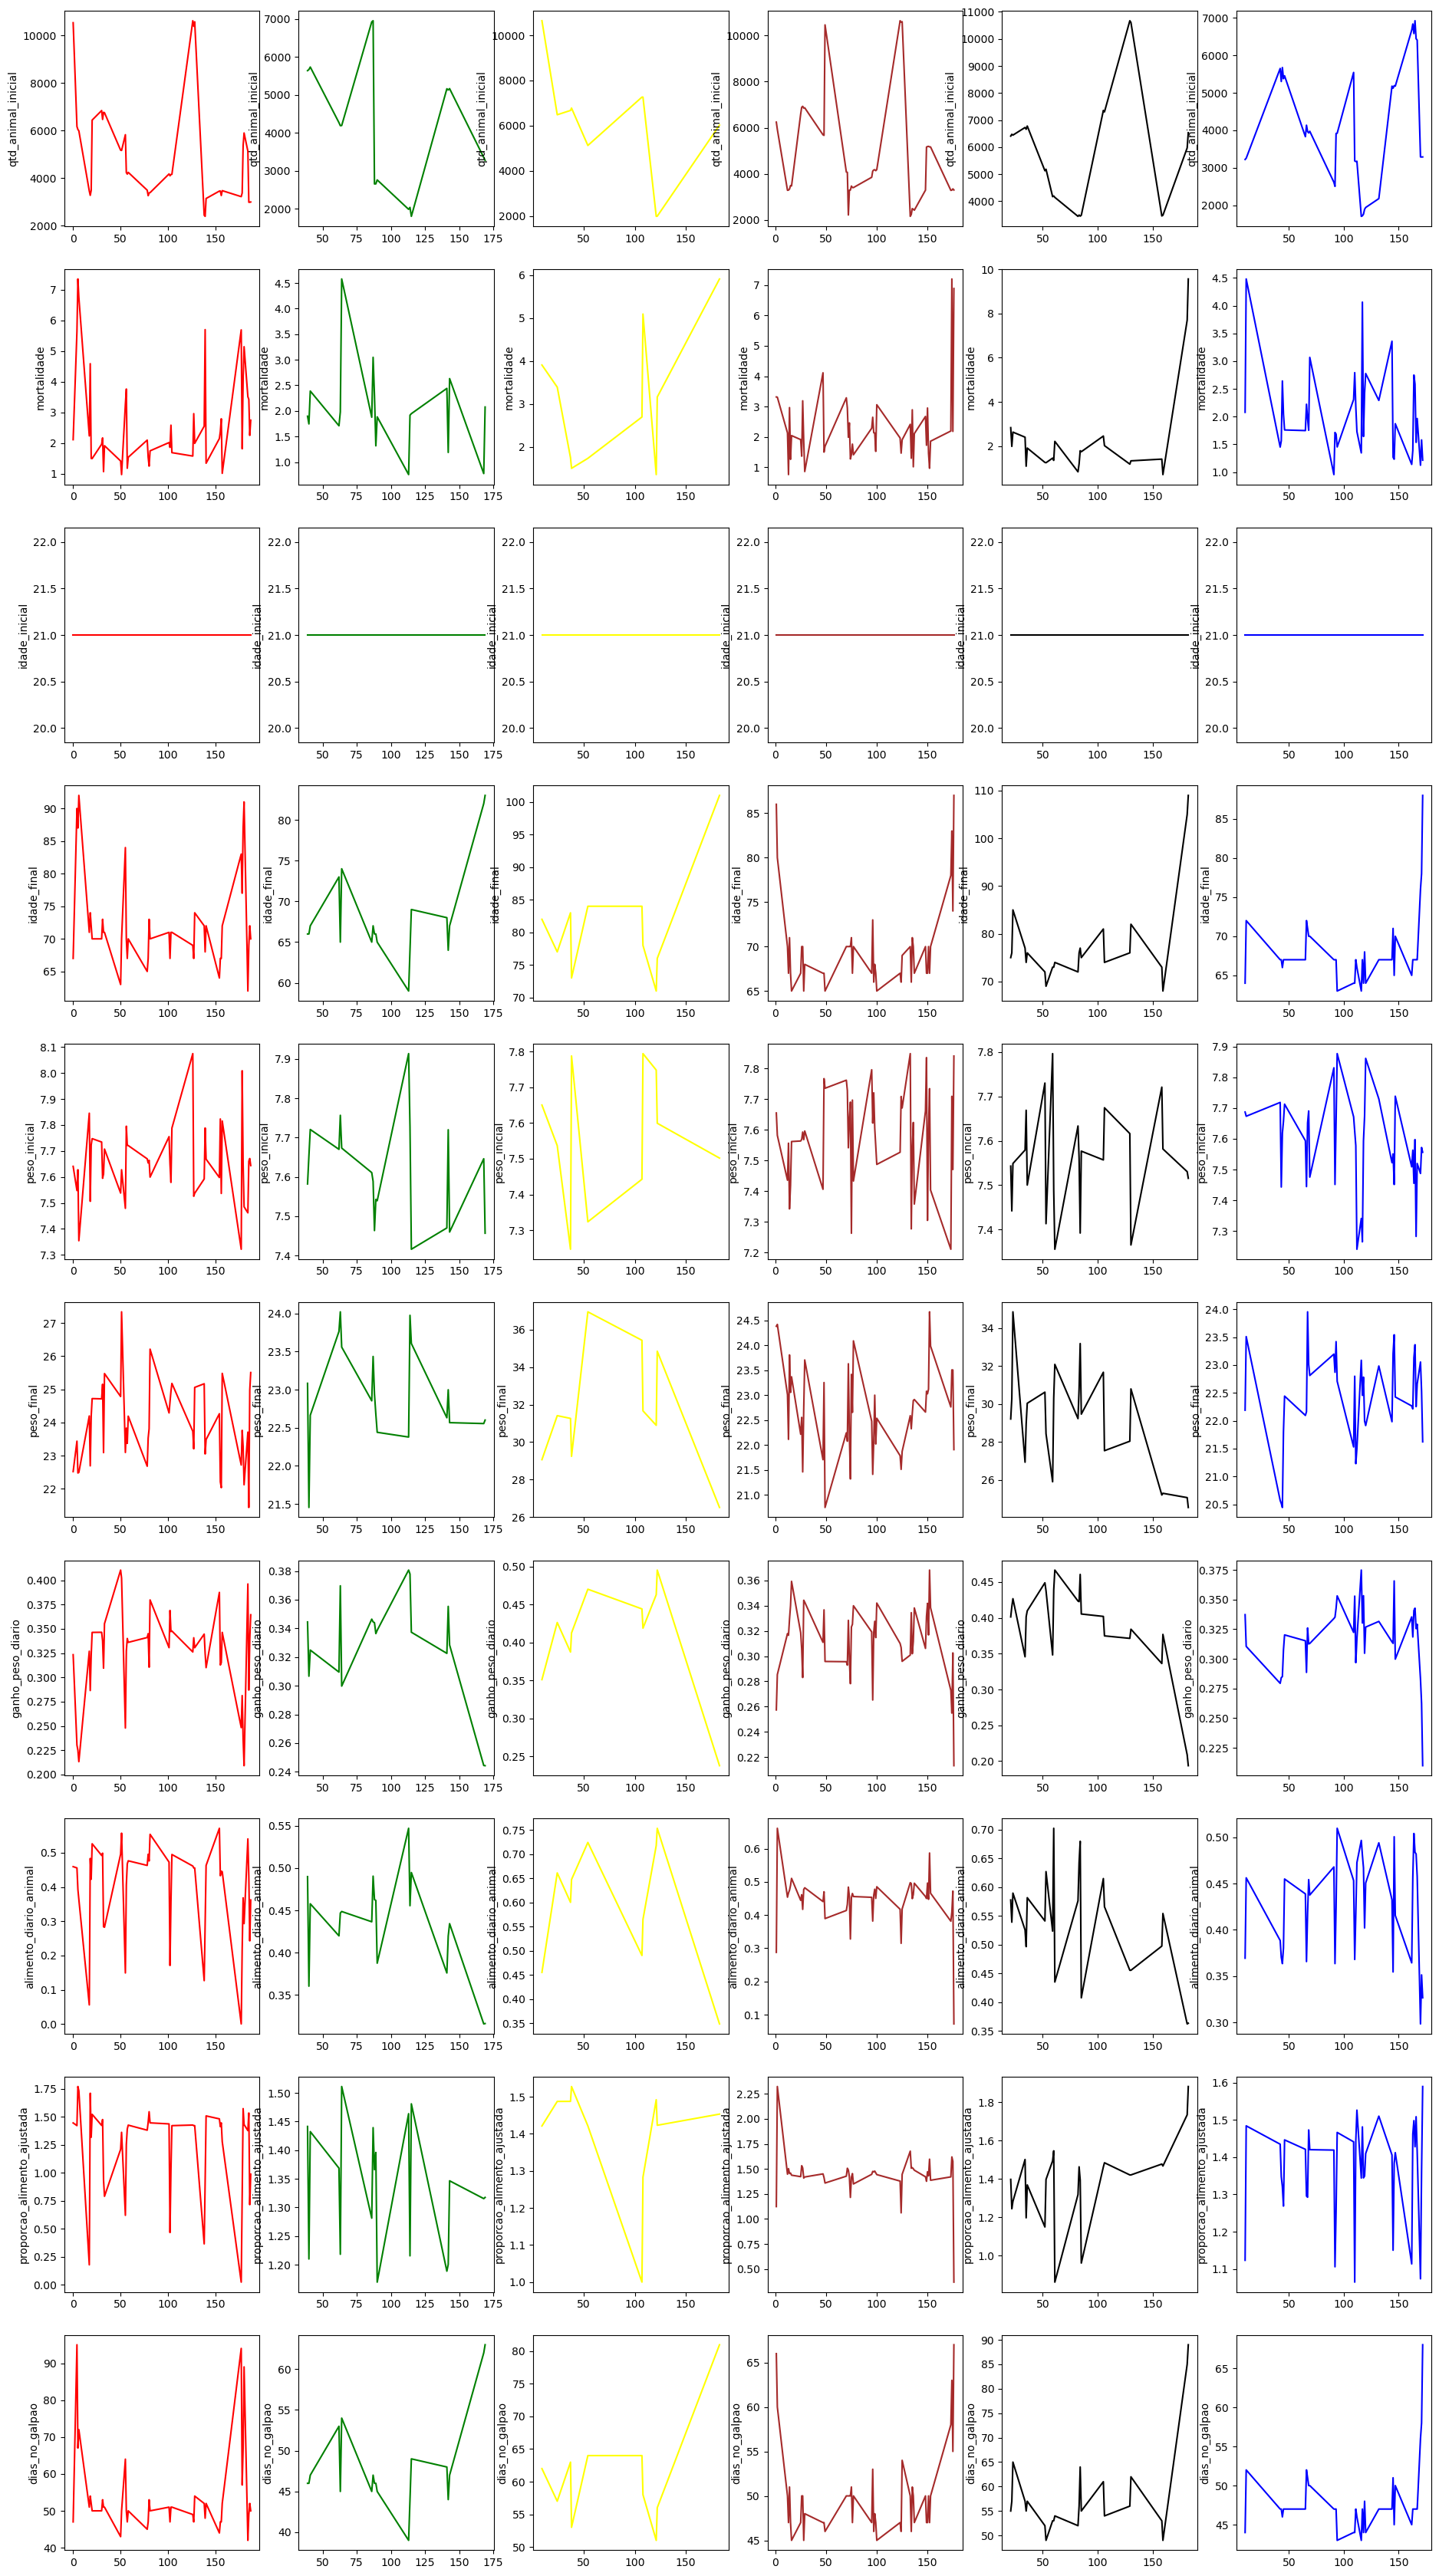

In [157]:
figura = plt.subplots(figsize = (23, 43))
i = 1

for coluna in colunas:
    sns.lineplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")
    sns.lineplot(dados_classe_2[coluna], ax = plt.subplot(10, 6, (i+1)), color = "green")
    sns.lineplot(dados_classe_3[coluna], ax = plt.subplot(10, 6, (i+2)), color = "yellow")
    sns.lineplot(dados_classe_4[coluna], ax = plt.subplot(10, 6, (i+3)), color = "brown")
    sns.lineplot(dados_classe_5[coluna], ax = plt.subplot(10, 6, (i+4)), color = "black")
    sns.lineplot(dados_classe_6[coluna], ax = plt.subplot(10, 6, (i+5)), color = "blue")
    i += 6

plt.show()

Com o gráfico de linhas nós podemos notar visualmente que, quanto mais dados, mais a classe possui dirturbios em sua linha.

Os gráficos das classes 1, 2 e 4 tendem a ser mais lineares que a outras classes.

Importante notar também que, como não foi realizada uma exclusão detalhada dos dados outliers, é muito possível que as classes de maior ocorrência estejam sendo influenciadas por tais valores.

#### Gráfico de distribuição

/tmp/ipykernel_48877/2415603081.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.distplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")
/tmp/ipykernel_48877/2415603081.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")
/tmp/ipykernel_48877/2415603081.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

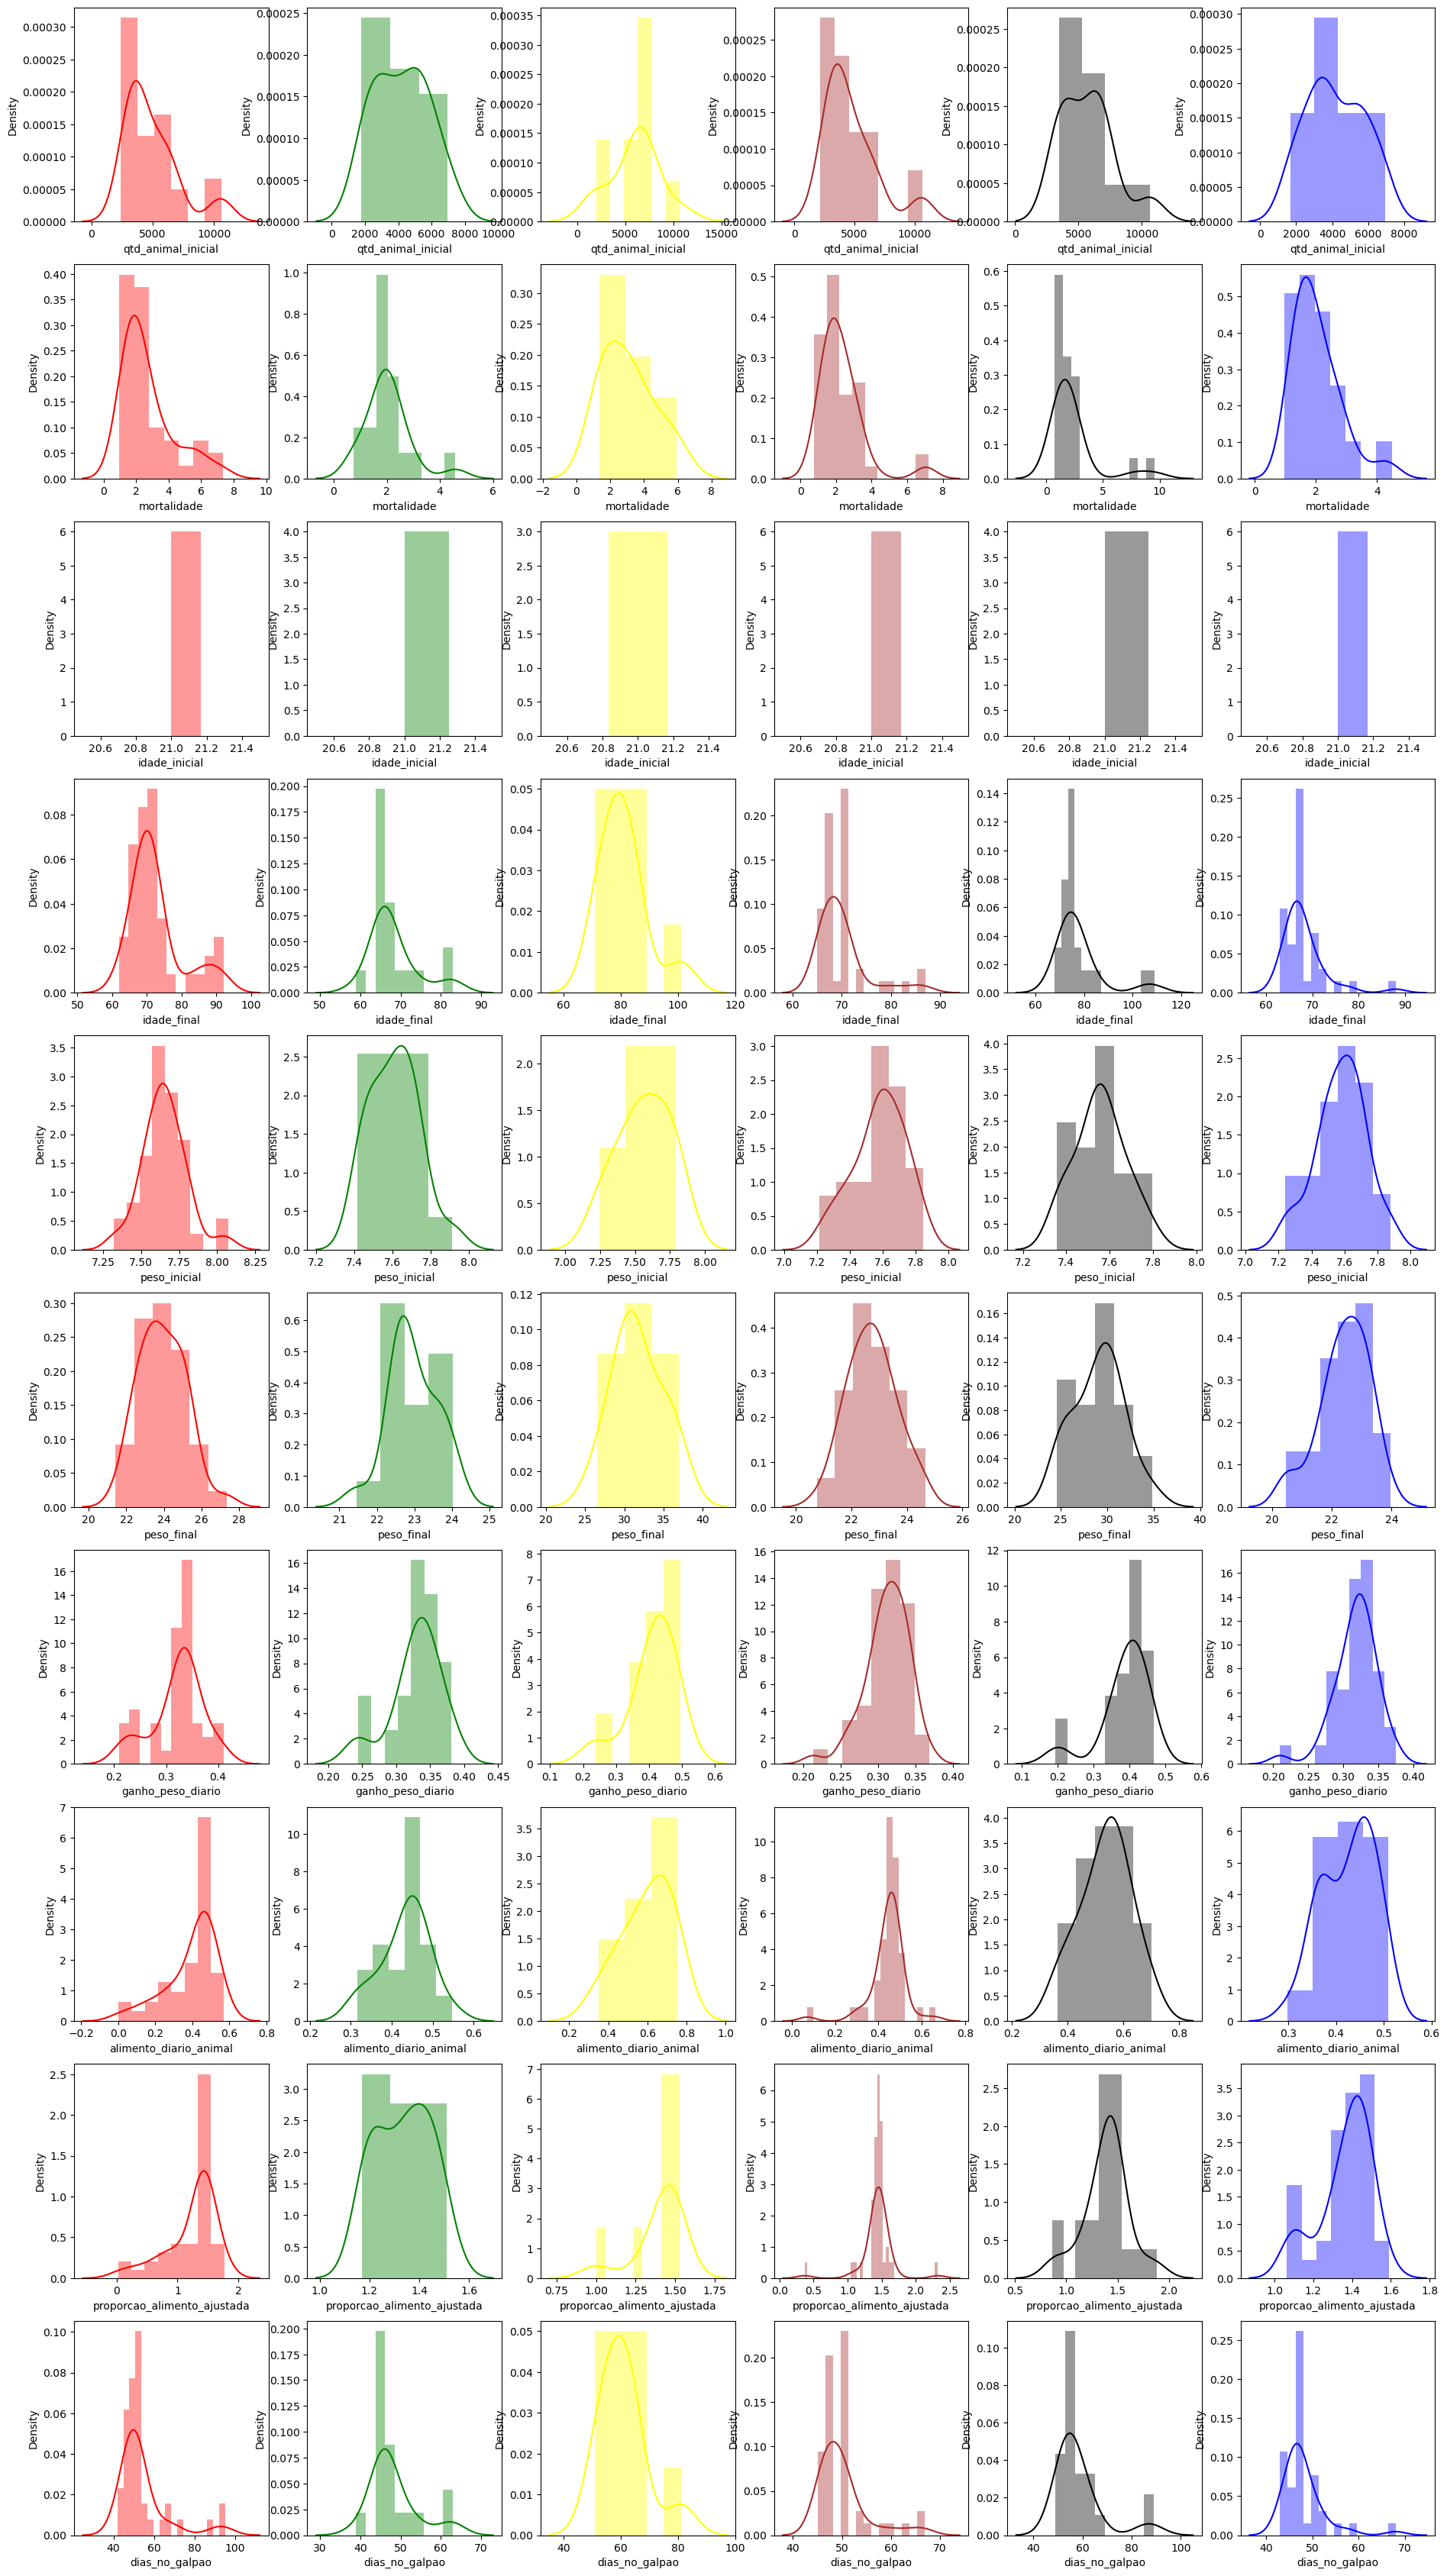

In [160]:
figura = plt.subplots(figsize = (23, 43))
i = 1

for coluna in colunas:
    sns.distplot(dados_classe_1[coluna], ax = plt.subplot(10, 6, i), color = "red")
    sns.distplot(dados_classe_2[coluna], ax = plt.subplot(10, 6, (i+1)), color = "green")
    sns.distplot(dados_classe_3[coluna], ax = plt.subplot(10, 6, (i+2)), color = "yellow")
    sns.distplot(dados_classe_4[coluna], ax = plt.subplot(10, 6, (i+3)), color = "brown")
    sns.distplot(dados_classe_5[coluna], ax = plt.subplot(10, 6, (i+4)), color = "black")
    sns.distplot(dados_classe_6[coluna], ax = plt.subplot(10, 6, (i+5)), color = "blue")
    i += 6

plt.show()

Como podemos ver acima, há uma surpresa nas classes menores.

Mesmo possuindo muito menos dados que as outras classes, suas distribuições são as que mais possuem disturbio, ou seja, seus dados ou estão aglomerados próximo a um valor fixo, ou estão muito espalhados, ao ponto de criar um máximo local na distribuição.

As classes maiores, têm distribuição mais esparsa, porém com poucos máximos locais.

#### Visualizando os dados de maneira escrita

In [173]:
print("Classe 0:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_1[coluna].max())
    print("Valor mínimo:", dados_classe_1[coluna].min())
    print("Desvio padrão:", dados_classe_1[coluna].std())
    print("Média:", dados_classe_1[coluna].mean())
    print("Mediana", dados_classe_1[coluna].median())
    print("=============================================\n")

Classe 0:

qtd_animal_inicial
Valor máximo: 10620
Valor mínimo: 2387
Desvio padrão: 2204.6414419176463
Média: 4912.704545454545
Mediana 4161.5

mortalidade
Valor máximo: 7.349776527065055
Valor mínimo: 0.968804495252858
Desvio padrão: 1.596306745225109
Média: 2.697018239731066
Mediana 2.125683750839115

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 92.0
Valor mínimo: 62.0
Desvio padrão: 7.409924206372562
Média: 72.5
Mediana 71.0

peso_inicial
Valor máximo: 8.075161958568737
Valor mínimo: 7.321355299968915
Desvio padrão: 0.14502610680417632
Média: 7.6532414033478515
Mediana 7.648856459105573

peso_final
Valor máximo: 27.33660731755038
Valor mínimo: 21.43398193189715
Desvio padrão: 1.2385183240516746
Média: 23.912371345935995
Mediana 23.784820785975317

ganho_peso_diario
Valor máximo: 0.4105614762111085
Valor mínimo: 0.2090604791260714
Desvio padrão: 0.04919199001636439
Média: 0.32180941716884237
Mediana 0.33058

In [172]:
print("Classe 1:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_2[coluna].max())
    print("Valor mínimo:", dados_classe_2[coluna].min())
    print("Desvio padrão:", dados_classe_2[coluna].std())
    print("Média:", dados_classe_2[coluna].mean())
    print("Mediana", dados_classe_2[coluna].median())
    print("=============================================\n")

Classe 1:

qtd_animal_inicial
Valor máximo: 6956
Valor mínimo: 1798
Desvio padrão: 1635.604448600181
Média: 4186.368421052632
Mediana 4193.0

mortalidade
Valor máximo: 4.579060338659671
Valor mínimo: 0.7564296520423601
Desvio padrão: 0.8480154904409847
Média: 2.0245554571917532
Mediana 1.9174041297935105

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 83.0
Valor mínimo: 59.0
Desvio padrão: 5.968239526102791
Média: 68.21052631578948
Mediana 66.0

peso_inicial
Valor máximo: 7.9133484619263745
Valor mínimo: 7.416017797552836
Desvio padrão: 0.12862423889032124
Média: 7.611054729927022
Mediana 7.610869188564828

peso_final
Valor máximo: 24.02284461763273
Valor mínimo: 21.452854578096947
Desvio padrão: 0.6432767020322168
Média: 22.958736888140553
Mediana 22.853869923484403

ganho_peso_diario
Valor máximo: 0.380645996829922
Valor mínimo: 0.2442668770613202
Desvio padrão: 0.03708805717779449
Média: 0.329250410265787
Me

In [170]:
print("Classe 2:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_3[coluna].max())
    print("Valor mínimo:", dados_classe_3[coluna].min())
    print("Desvio padrão:", dados_classe_3[coluna].std())
    print("Média:", dados_classe_3[coluna].mean())
    print("Mediana", dados_classe_3[coluna].median())
    print("=============================================\n")

Classe 2:

qtd_animal_inicial
Valor máximo: 10644
Valor mínimo: 1986
Desvio padrão: 2560.257341666176
Média: 6023.1
Mediana 6578.0

mortalidade
Valor máximo: 5.909694555112882
Valor mínimo: 1.3595166163141994
Desvio padrão: 1.5632958384888271
Média: 3.0520974157928222
Mediana 2.9304442439360967

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 101.0
Valor mínimo: 71.0
Desvio padrão: 8.412292592787454
Média: 80.9
Mediana 80.0

peso_inicial
Valor máximo: 7.794376376651981
Valor mínimo: 7.246668664768469
Desvio padrão: 0.1896675461416944
Média: 7.563183785545033
Mediana 7.568055293826857

peso_final
Valor máximo: 36.94620580055622
Valor mínimo: 26.51685779816513
Desvio padrão: 3.1990306659200893
Média: 31.729137281623615
Mediana 31.33859641451577

ganho_peso_diario
Valor máximo: 0.4954247097253711
Valor mínimo: 0.237686859595258
Desvio padrão: 0.07373005895037724
Média: 0.4106767803527912
Mediana 0.42259750726157064

In [171]:
print("Classe 3:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_4[coluna].max())
    print("Valor mínimo:", dados_classe_4[coluna].min())
    print("Desvio padrão:", dados_classe_4[coluna].std())
    print("Média:", dados_classe_4[coluna].mean())
    print("Mediana", dados_classe_4[coluna].median())
    print("=============================================\n")

Classe 3:

qtd_animal_inicial
Valor máximo: 10644
Valor mínimo: 2153
Desvio padrão: 2244.4386770466967
Média: 4740.36170212766
Mediana 4076.0

mortalidade
Valor máximo: 7.201458523245215
Valor mínimo: 0.7594167679222357
Desvio padrão: 1.2587188805260796
Média: 2.2932203827844626
Mediana 2.0437535981577435

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 87.0
Valor mínimo: 65.0
Desvio padrão: 5.064614869294907
Média: 69.95744680851064
Mediana 70.0

peso_inicial
Valor máximo: 7.84868091035764
Valor mínimo: 7.211048156049985
Desvio padrão: 0.15925032418950105
Média: 7.579098518762094
Mediana 7.593088023088023

peso_final
Valor máximo: 24.672191834342645
Valor mínimo: 20.74974336541265
Desvio padrão: 0.8808695090465187
Média: 22.733536760858364
Mediana 22.66219169528567

ganho_peso_diario
Valor máximo: 0.3682113670616515
Valor mínimo: 0.2131608671434471
Desvio padrão: 0.02918718101117243
Média: 0.31185655715149474
M

In [169]:
print("Classe 4:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_5[coluna].max())
    print("Valor mínimo:", dados_classe_5[coluna].min())
    print("Desvio padrão:", dados_classe_5[coluna].std())
    print("Média:", dados_classe_5[coluna].mean())
    print("Mediana", dados_classe_5[coluna].median())
    print("=============================================\n")

Classe 4:

qtd_animal_inicial
Valor máximo: 10673
Valor mínimo: 3444
Desvio padrão: 2101.6923681349467
Média: 5721.913043478261
Mediana 5974.0

mortalidade
Valor máximo: 9.562423500611995
Valor mínimo: 0.7173601147776184
Desvio padrão: 2.101828048966669
Média: 2.280500911408849
Mediana 1.7503586800573887

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 109.0
Valor mínimo: 68.0
Desvio padrão: 9.944907529522384
Média: 77.91304347826087
Mediana 75.0

peso_inicial
Valor máximo: 7.795930009587728
Valor mínimo: 7.356068499758803
Desvio padrão: 0.116585555671719
Média: 7.556056847062833
Mediana 7.556898613753738

peso_final
Valor máximo: 34.86336201402167
Valor mínimo: 24.54825410252073
Desvio padrão: 2.7235729840214824
Média: 29.067971537611356
Mediana 29.23267935578331

ganho_peso_diario
Valor máximo: 0.4667560494735124
Valor mínimo: 0.1935525078135005
Desvio padrão: 0.06839933384049691
Média: 0.38703896666870685
Med

In [168]:
print("Classe 5:\n")

for coluna in colunas:
    print(coluna)
    print("Valor máximo:", dados_classe_6[coluna].max())
    print("Valor mínimo:", dados_classe_6[coluna].min())
    print("Desvio padrão:", dados_classe_6[coluna].std())
    print("Média:", dados_classe_6[coluna].mean())
    print("Mediana", dados_classe_6[coluna].median())
    print("=============================================\n")

Classe 5:

qtd_animal_inicial
Valor máximo: 6922
Valor mínimo: 1708
Desvio padrão: 1590.1621985865986
Média: 4190.846153846154
Mediana 3932.0

mortalidade
Valor máximo: 4.482652747927541
Valor mínimo: 0.95565749235474
Desvio padrão: 0.7828823193373611
Média: 2.0303263960212576
Mediana 1.76017601760176

idade_inicial
Valor máximo: 21.0
Valor mínimo: 21.0
Desvio padrão: 0.0
Média: 21.0
Mediana 21.0

idade_final
Valor máximo: 88.0
Valor mínimo: 63.0
Desvio padrão: 4.585372506748064
Média: 68.02564102564102
Mediana 67.0

peso_inicial
Valor máximo: 7.876902880448636
Valor mínimo: 7.24083412023922
Desvio padrão: 0.15073546388695702
Média: 7.578458619542999
Mediana 7.593488108720272

peso_final
Valor máximo: 23.953956834532374
Valor mínimo: 20.444152787834906
Desvio padrão: 0.8377352604418223
Média: 22.41593854936531
Mediana 22.455266343825667

ganho_peso_diario
Valor máximo: 0.3748660667750098
Valor mínimo: 0.2099370003207476
Desvio padrão: 0.03020142856824584
Média: 0.31782663740695694
Medi

Como era esperado, as classes com mais dados possuem valores de desvio padrão mais altos que as classes com menos dados.

A média e a mediana das classes com menos dados também são muito próximas, salvo algumas exceções.

A classe com maior valor de quantidade de animais, no inicio do período de engorda, foi a classe 4. A classe com menor valor de quantidade de animais, no inicio do período de engorda, foi a classe 5. Esse é uma informação interessante, pois podemos notar que o maior valor apareceu numa classe com poucos dados, enquanto o menor valor apareceu numa classe com muitos dados.

Com respeito a quantidade de mortes, podemos ver que a classe com maior número de animais (classe 4) também foi a classe com maior número de mortes, com aproximadamente 9,5 mortes durante o período de engorda.

A classe 2 sobressaiu as outras classes, com o maior valor de peso do animal após o perído de engorda. Essa informação chama atenção, pois a classe 2 é a segunda em quesito menor número de dados. No entanto, podemos notar que nesta mesma classe, há um ou mais animais que passaram 101 dias no periodo de engorda. Esse valor de dias é o maior dentre todas as classes.